# NBA 2020 Playoffs Prediction, who's going to be the champs?

In [1]:
#Using data from the 2004-2005 season to the 2019-2020 season, scraped from basketball-reference.com

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('nba_data.csv')
df2 = pd.read_csv('playoffs_data.csv')

In [4]:
pd.set_option('display.max_columns',None)
df1.head()

,Season,Team,W_x,L_x,W/L%,Finish_x,SRS,_x,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,_x.1,Playoffs,Coaches,Top WS,Tm,W_y,L_y,Finish_y,_y,Age,Ht.,Wt.,_y.1,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2019-20,Atlanta Hawks,20,47,0.299,5th of 5,-7.71,NaN,103.0,2.7,107.2,-3.4,114.8,4.2,NaN,NaN,L. Pierce (20-47),T. Young (5.9),ATL,20,47,5,NaN,24.1,6-6,216,NaN,67,16280,2723,6067,0.449,805,2416,0.333,1918,3651,0.525,1237,1566,0.790,661,2237,2898,1605,523,341,1086,1548,7488
1,2018-19,Atlanta Hawks,29,53,0.354,5th of 5,-6.06,NaN,103.9,3.9,108.1,-2.3,113.9,3.5,NaN,NaN,L. Pierce (29-53),J. Collins (6.0),ATL,29,53,5,NaN,25.1,6-7,215,NaN,82,19855,3392,7524,0.451,1067,3034,0.352,2325,4490,0.518,1443,1918,0.752,955,2825,3780,2118,675,419,1397,1932,9294
2,2017-18,Atlanta Hawks,24,58,0.293,5th of 5,-5.30,NaN,98.3,1.0,105.0,-3.6,110.6,2.0,NaN,NaN,M. Budenholzer (24-58),J. Collins (5.4),ATL,24,58,5,NaN,25.4,6-6,212,NaN,82,19705,3130,7015,0.446,917,2544,0.360,2213,4471,0.495,1298,1654,0.785,743,2693,3436,1946,638,348,1276,1606,8475
3,2016-17,Atlanta Hawks*,43,39,0.524,2nd of 5,-1.23,NaN,97.4,1.0,104.9,-3.9,105.7,-3.1,NaN,Lost E. Conf. 1st Rnd.,M. Budenholzer (43-39),D. Howard (8.3),ATL,43,39,2,NaN,27.9,6-6,219,NaN,82,19880,3123,6918,0.451,729,2137,0.341,2394,4781,0.501,1484,2039,0.728,842,2793,3635,1938,672,397,1294,1491,8459
4,2015-16,Atlanta Hawks*,48,34,0.585,2nd of 5,3.49,NaN,97.1,1.3,105.1,-1.3,101.4,-5.0,NaN,Lost E. Conf. Semis,M. Budenholzer (48-34),P. Millsap (10.1),ATL,48,34,2,NaN,28.2,6-6,217,NaN,82,19830,3168,6923,0.458,815,2326,0.350,2353,4597,0.512,1282,1638,0.783,679,2772,3451,2100,747,486,1226,1570,8433


In [5]:
df2.head()

,Season,Team,Wins
0,2004-05,San Antonio Spurs,16
1,2004-05,Detroit Pistons,15
2,2004-05,Miami Heat,11
3,2004-05,Phoenix Suns,9
4,2004-05,Dallas Mavericks,6


In [6]:
#Remove asteriks on df1 then merge the 2 tables on Season and Team

In [7]:
df1['Team'] = df1['Team'].apply(lambda x: x.split('*')[0])
df = pd.merge(df1,df2,how='left',on=['Season','Team'])

In [8]:
#Check if it worked
df[df['Team'] == 'San Antonio Spurs']

,Season,Team,W_x,L_x,W/L%,Finish_x,SRS,_x,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,_x.1,Playoffs,Coaches,Top WS,Tm,W_y,L_y,Finish_y,_y,Age,Ht.,Wt.,_y.1,G,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Wins
416,2019-20,San Antonio Spurs,32,39,0.451,4th of 5,-0.65,NaN,100.5,0.2,112.4,1.8,113.5,2.9,NaN,NaN,G. Popovich (32-39),D. DeRozan (7.3),SAS,32,39,4,NaN,27.6,6-6,216,NaN,71,17215,2995,6350,0.472,760,2021,0.376,2235,4329,0.516,1348,1664,0.810,640,2530,3170,1751,518,390,895,1377,8098,NaN
417,2018-19,San Antonio Spurs,48,34,0.585,2nd of 5,1.80,NaN,98.3,-1.7,112.9,2.5,111.2,0.8,NaN,Lost W. Conf. 1st Rnd.,G. Popovich (48-34),L. Aldridge (9.3),SAS,48,34,2,NaN,28.8,6-6,218,NaN,82,19805,3468,7248,0.478,812,2071,0.392,2656,5177,0.513,1408,1720,0.819,757,2910,3667,2013,501,386,992,1487,9156,3.0
418,2017-18,San Antonio Spurs,47,35,0.573,3rd of 5,2.89,NaN,95.0,-2.3,107.9,-0.7,104.8,-3.8,NaN,Lost W. Conf. 1st Rnd.,G. Popovich (47-35),L. Aldridge (10.9),SAS,47,35,3,NaN,29.3,6-6,214,NaN,82,19730,3202,6999,0.457,696,1977,0.352,2506,5022,0.499,1324,1715,0.772,849,2777,3626,1868,628,460,1078,1408,8424,1.0
419,2016-17,San Antonio Spurs,61,21,0.744,1st of 5,7.13,NaN,94.2,-2.2,111.1,2.3,103.5,-5.3,NaN,Lost W. Conf. Finals,G. Popovich (61-21),K. Leonard (13.6),SAS,61,21,1,NaN,29.6,6-7,222,NaN,82,19805,3222,6864,0.469,753,1927,0.391,2469,4937,0.500,1440,1806,0.797,821,2777,3598,1954,655,484,1101,1498,8637,8.0
420,2015-16,San Antonio Spurs,67,15,0.817,1st of 5,10.28,NaN,93.8,-2.0,110.3,3.9,99.0,-7.4,NaN,Lost W. Conf. Semis,G. Popovich (67-15),K. Leonard (13.7),SAS,67,15,1,NaN,30.3,6-7,223,NaN,82,19705,3289,6797,0.484,570,1518,0.375,2719,5279,0.515,1342,1672,0.803,770,2831,3601,2010,677,485,1071,1433,8490,6.0
421,2014-15,San Antonio Spurs,55,27,0.671,3rd of 5,6.34,NaN,93.8,-0.1,108.5,2.9,102.0,-3.6,NaN,Lost W. Conf. 1st Rnd.,G. Popovich (55-27),T. Duncan (9.6),SAS,55,27,3,NaN,29.8,6-6,215,NaN,82,19955,3208,6854,0.468,677,1847,0.367,2531,5007,0.505,1368,1754,0.780,806,2772,3578,2000,657,444,1146,1564,8461,3.0
422,2013-14,San Antonio Spurs,62,20,0.756,1st of 5,8.00,NaN,95.0,1.1,110.5,3.8,102.4,-4.3,NaN,Won Finals,G. Popovich (62-20),K. Leonard (7.7),SAS,62,20,1,NaN,28.9,6-6,213,NaN,82,19755,3326,6844,0.486,698,1757,0.397,2628,5087,0.517,1289,1642,0.785,762,2786,3548,2064,604,420,1180,1495,8639,16.0
423,2012-13,San Antonio Spurs,58,24,0.707,1st of 5,6.67,NaN,94.2,2.2,108.3,2.4,101.6,-4.3,NaN,Lost Finals,G. Popovich (58-24),T. Parker (9.3),SAS,58,24,1,NaN,28.6,6-6,217,NaN,82,19880,3210,6675,0.481,663,1764,0.376,2547,4911,0.519,1365,1725,0.791,666,2721,3387,2058,695,446,1206,1427,8448,15.0
424,2011-12,San Antonio Spurs,50,16,0.758,1st of 5,7.28,NaN,92.9,1.6,110.9,6.3,103.2,-1.4,NaN,Lost W. Conf. Finals,G. Popovich (50-16),T. Parker (7.1),SAS,50,16,1,NaN,27.5,6-6,221,NaN,66,15940,2611,5463,0.478,552,1405,0.393,2059,4058,0.507,1067,1427,0.748,683,2153,2836,1528,490,293,895,1143,6841,10.0
425,2010-11,San Antonio Spurs,61,21,0.744,1st of 5,5.86,NaN,92.3,0.2,111.8,4.5,105.6,-1.7,NaN,Lost W. Conf. 1st Rnd.,G. Popovich (61-21),M. Ginóbili (9.9),SAS,61,21,1,NaN,28.8,6-6,217,NaN,82,19780,3148,6628,0.475,685,1727,0.397,2463,4901,0.503,1521,1984,0.767,829,2603,3432,1836,602,372,1101,1556,8502,2.0


In [9]:
df2[df2['Team']=='San Antonio Spurs']

,Season,Team,Wins
0,2004-05,San Antonio Spurs,16
22,2005-06,San Antonio Spurs,7
32,2006-07,San Antonio Spurs,16
51,2007-08,San Antonio Spurs,9
77,2008-09,San Antonio Spurs,1
86,2009-10,San Antonio Spurs,4
107,2010-11,San Antonio Spurs,2
115,2011-12,San Antonio Spurs,10
129,2012-13,San Antonio Spurs,15
144,2013-14,San Antonio Spurs,16


In [10]:
#Rename wins as playoff wins to avoid confusion with regular season wins (denoted W)
df.rename(columns={'Wins':'Playoff Wins'},inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 479
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        480 non-null    object 
 1   Team          480 non-null    object 
 2   W_x           480 non-null    int64  
 3   L_x           480 non-null    int64  
 4   W/L%          480 non-null    float64
 5   Finish_x      480 non-null    object 
 6   SRS           480 non-null    float64
 7    _x           0 non-null      float64
 8   Pace          480 non-null    float64
 9   Rel Pace      480 non-null    float64
 10  ORtg          480 non-null    float64
 11  Rel ORtg      480 non-null    float64
 12  DRtg          480 non-null    float64
 13  Rel DRtg      480 non-null    float64
 14   _x.1         0 non-null      float64
 15  Playoffs      256 non-null    object 
 16  Coaches       480 non-null    object 
 17  Top WS        480 non-null    object 
 18  Tm            480 non-null    

In [12]:
#Drop unnecessary columns
df.drop(['MP','Finish_y','Finish_x','Coaches','Tm','W_y','L_y'],axis=1,inplace=True)

In [13]:
#Convert Playoffs column to whether or not a team made the playoffs 
def make_playoffs(string):
    if str(string).lower() == "nan":
        return 0
    else:
        return 1
df['Make Playoffs'] = df['Playoffs'].apply(lambda x: make_playoffs(x))
df.drop('Playoffs',axis=1,inplace=True)

In [14]:
#Convert null values in playoff wins to 0
def playoff_wins(wins):
    if str(wins).lower() == "nan":
        return 0
    else:
        return wins
df['Playoff Wins'] = df['Playoff Wins'].apply(lambda x: playoff_wins(x))

In [15]:
#Now that we have dealt with the na values, we can drop all na
df.dropna(axis=1,inplace=True)
df.head()

,Season,Team,W_x,L_x,W/L%,SRS,Pace,Rel Pace,ORtg,Rel ORtg,DRtg,Rel DRtg,Top WS,Age,Ht.,Wt.,G,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoff Wins,Make Playoffs
0,2019-20,Atlanta Hawks,20,47,0.299,-7.71,103.0,2.7,107.2,-3.4,114.8,4.2,T. Young (5.9),24.1,6-6,216,67,2723,6067,0.449,805,2416,0.333,1918,3651,0.525,1237,1566,0.790,661,2237,2898,1605,523,341,1086,1548,7488,0.0,0
1,2018-19,Atlanta Hawks,29,53,0.354,-6.06,103.9,3.9,108.1,-2.3,113.9,3.5,J. Collins (6.0),25.1,6-7,215,82,3392,7524,0.451,1067,3034,0.352,2325,4490,0.518,1443,1918,0.752,955,2825,3780,2118,675,419,1397,1932,9294,0.0,0
2,2017-18,Atlanta Hawks,24,58,0.293,-5.30,98.3,1.0,105.0,-3.6,110.6,2.0,J. Collins (5.4),25.4,6-6,212,82,3130,7015,0.446,917,2544,0.360,2213,4471,0.495,1298,1654,0.785,743,2693,3436,1946,638,348,1276,1606,8475,0.0,0
3,2016-17,Atlanta Hawks,43,39,0.524,-1.23,97.4,1.0,104.9,-3.9,105.7,-3.1,D. Howard (8.3),27.9,6-6,219,82,3123,6918,0.451,729,2137,0.341,2394,4781,0.501,1484,2039,0.728,842,2793,3635,1938,672,397,1294,1491,8459,2.0,1
4,2015-16,Atlanta Hawks,48,34,0.585,3.49,97.1,1.3,105.1,-1.3,101.4,-5.0,P. Millsap (10.1),28.2,6-6,217,82,3168,6923,0.458,815,2326,0.350,2353,4597,0.512,1282,1638,0.783,679,2772,3451,2100,747,486,1226,1570,8433,4.0,1


In [16]:
#Rename regular season wins and losses to W and L
df.rename(columns={'W_x':'W','L_x':'L'},inplace=True)

In [17]:
#Since average player height (Ht.) is stored as foot, lets convert it to cm
def foot_inches_to_cm(str1):
    foot = float(str1.split('-')[0])
    inches = float(str1.split('-')[1])
    return (foot*30.48) + (inches*2.54)
df['Ht.'] = df['Ht.'].apply(lambda x: foot_inches_to_cm(x))

In [18]:
#Let's only get the top win share score of each team, excluding the player name
df['Top WS'] = df['Top WS'].apply(lambda x: float(x.split('(')[1][:-1]))

In [19]:
#Drop remaining unnecessary columns
#2PA and 3PA can be calculated backwards using 2P,3P and 2P%,3P%
#The same goes for FGA and FTA.

#ORTg and DRtg on it's own does not mean anything, it should be compared to 
#the rest of the league to be significant, which is conveniently already in our data
#as Rel ORtg and Rel DRtg.
#The same logic applies to Pace.

#W/L% is calculated using W and L, so both W and L will be strongly correlated to W/L% and to each other

df.drop(['2PA','3PA','FGA','FTA','Pace','ORtg','DRtg','W','L'],axis=1,inplace=True)

In [20]:
df.head()

,Season,Team,W/L%,SRS,Rel Pace,Rel ORtg,Rel DRtg,Top WS,Age,Ht.,Wt.,G,FG,FG%,3P,3P%,2P,2P%,FT,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Playoff Wins,Make Playoffs
0,2019-20,Atlanta Hawks,0.299,-7.71,2.7,-3.4,4.2,5.9,24.1,198.12,216,67,2723,0.449,805,0.333,1918,0.525,1237,0.790,661,2237,2898,1605,523,341,1086,1548,7488,0.0,0
1,2018-19,Atlanta Hawks,0.354,-6.06,3.9,-2.3,3.5,6.0,25.1,200.66,215,82,3392,0.451,1067,0.352,2325,0.518,1443,0.752,955,2825,3780,2118,675,419,1397,1932,9294,0.0,0
2,2017-18,Atlanta Hawks,0.293,-5.30,1.0,-3.6,2.0,5.4,25.4,198.12,212,82,3130,0.446,917,0.360,2213,0.495,1298,0.785,743,2693,3436,1946,638,348,1276,1606,8475,0.0,0
3,2016-17,Atlanta Hawks,0.524,-1.23,1.0,-3.9,-3.1,8.3,27.9,198.12,219,82,3123,0.451,729,0.341,2394,0.501,1484,0.728,842,2793,3635,1938,672,397,1294,1491,8459,2.0,1
4,2015-16,Atlanta Hawks,0.585,3.49,1.3,-1.3,-5.0,10.1,28.2,198.12,217,82,3168,0.458,815,0.350,2353,0.512,1282,0.783,679,2772,3451,2100,747,486,1226,1570,8433,4.0,1


# EDA and Feature Engineering

In [21]:
#The number of games played each year is different, for example this year because of COVID
df['G'].values

array([67, 82, 82, 82, 82, 82, 82, 82, 66, 82, 82, 82, 82, 82, 82, 82, 72,
       82, 82, 82, 82, 82, 82, 81, 66, 82, 82, 82, 82, 82, 82, 82, 72, 82,
       82, 82, 82, 82, 82, 82, 66, 82, 82, 82, 82, 82, 82, 82, 65, 82, 82,
       82, 82, 82, 82, 82, 66, 82, 82, 82, 82, 82, 82, 82, 65, 82, 82, 82,
       82, 82, 82, 82, 66, 82, 82, 82, 82, 82, 82, 82, 65, 82, 82, 82, 82,
       82, 82, 82, 66, 82, 82, 82, 82, 82, 82, 82, 75, 82, 82, 82, 82, 82,
       82, 82, 66, 82, 82, 82, 82, 82, 82, 82, 73, 82, 82, 82, 82, 82, 82,
       82, 66, 82, 82, 82, 82, 82, 82, 82, 66, 82, 82, 82, 82, 82, 82, 82,
       66, 82, 82, 82, 82, 82, 82, 82, 65, 82, 82, 82, 82, 82, 82, 82, 66,
       82, 82, 82, 82, 82, 82, 82, 72, 82, 82, 82, 82, 82, 82, 82, 66, 82,
       82, 82, 82, 82, 82, 82, 73, 82, 82, 82, 82, 82, 82, 81, 66, 82, 82,
       82, 82, 82, 82, 82, 72, 82, 82, 82, 82, 82, 82, 82, 66, 82, 82, 82,
       82, 82, 82, 82, 71, 82, 82, 82, 82, 82, 82, 82, 66, 82, 82, 82, 82,
       82, 82, 82, 73, 82

In [22]:
#Because of this, we need to convert to per game stats before we plot our heatmap
stats_to_be_converted = ['FG','3P','2P','FT','ORB','DRB','TRB','AST','STL','BLK','TOV','PF','PTS']
for stat in stats_to_be_converted:
    df[f'{stat}/gm'] = df[f'{stat}']/df['G']
    df.drop(f'{stat}',axis=1,inplace=True)

In [23]:
#Let's not drop Season and Team columns just yet, we still need to extract the 2019-2020 season as our
#final predictions data
#We can drop our games column now
df.drop('G',axis=1,inplace=True)
df.head()

,Season,Team,W/L%,SRS,Rel Pace,Rel ORtg,Rel DRtg,Top WS,Age,Ht.,Wt.,FG%,3P%,2P%,FT%,Playoff Wins,Make Playoffs,FG/gm,3P/gm,2P/gm,FT/gm,ORB/gm,DRB/gm,TRB/gm,AST/gm,STL/gm,BLK/gm,TOV/gm,PF/gm,PTS/gm
0,2019-20,Atlanta Hawks,0.299,-7.71,2.7,-3.4,4.2,5.9,24.1,198.12,216,0.449,0.333,0.525,0.790,0.0,0,40.641791,12.014925,28.626866,18.462687,9.865672,33.388060,43.253731,23.955224,7.805970,5.089552,16.208955,23.104478,111.761194
1,2018-19,Atlanta Hawks,0.354,-6.06,3.9,-2.3,3.5,6.0,25.1,200.66,215,0.451,0.352,0.518,0.752,0.0,0,41.365854,13.012195,28.353659,17.597561,11.646341,34.451220,46.097561,25.829268,8.231707,5.109756,17.036585,23.560976,113.341463
2,2017-18,Atlanta Hawks,0.293,-5.30,1.0,-3.6,2.0,5.4,25.4,198.12,212,0.446,0.360,0.495,0.785,0.0,0,38.170732,11.182927,26.987805,15.829268,9.060976,32.841463,41.902439,23.731707,7.780488,4.243902,15.560976,19.585366,103.353659
3,2016-17,Atlanta Hawks,0.524,-1.23,1.0,-3.9,-3.1,8.3,27.9,198.12,219,0.451,0.341,0.501,0.728,2.0,1,38.085366,8.890244,29.195122,18.097561,10.268293,34.060976,44.329268,23.634146,8.195122,4.841463,15.780488,18.182927,103.158537
4,2015-16,Atlanta Hawks,0.585,3.49,1.3,-1.3,-5.0,10.1,28.2,198.12,217,0.458,0.350,0.512,0.783,4.0,1,38.634146,9.939024,28.695122,15.634146,8.280488,33.804878,42.085366,25.609756,9.109756,5.926829,14.951220,19.146341,102.841463


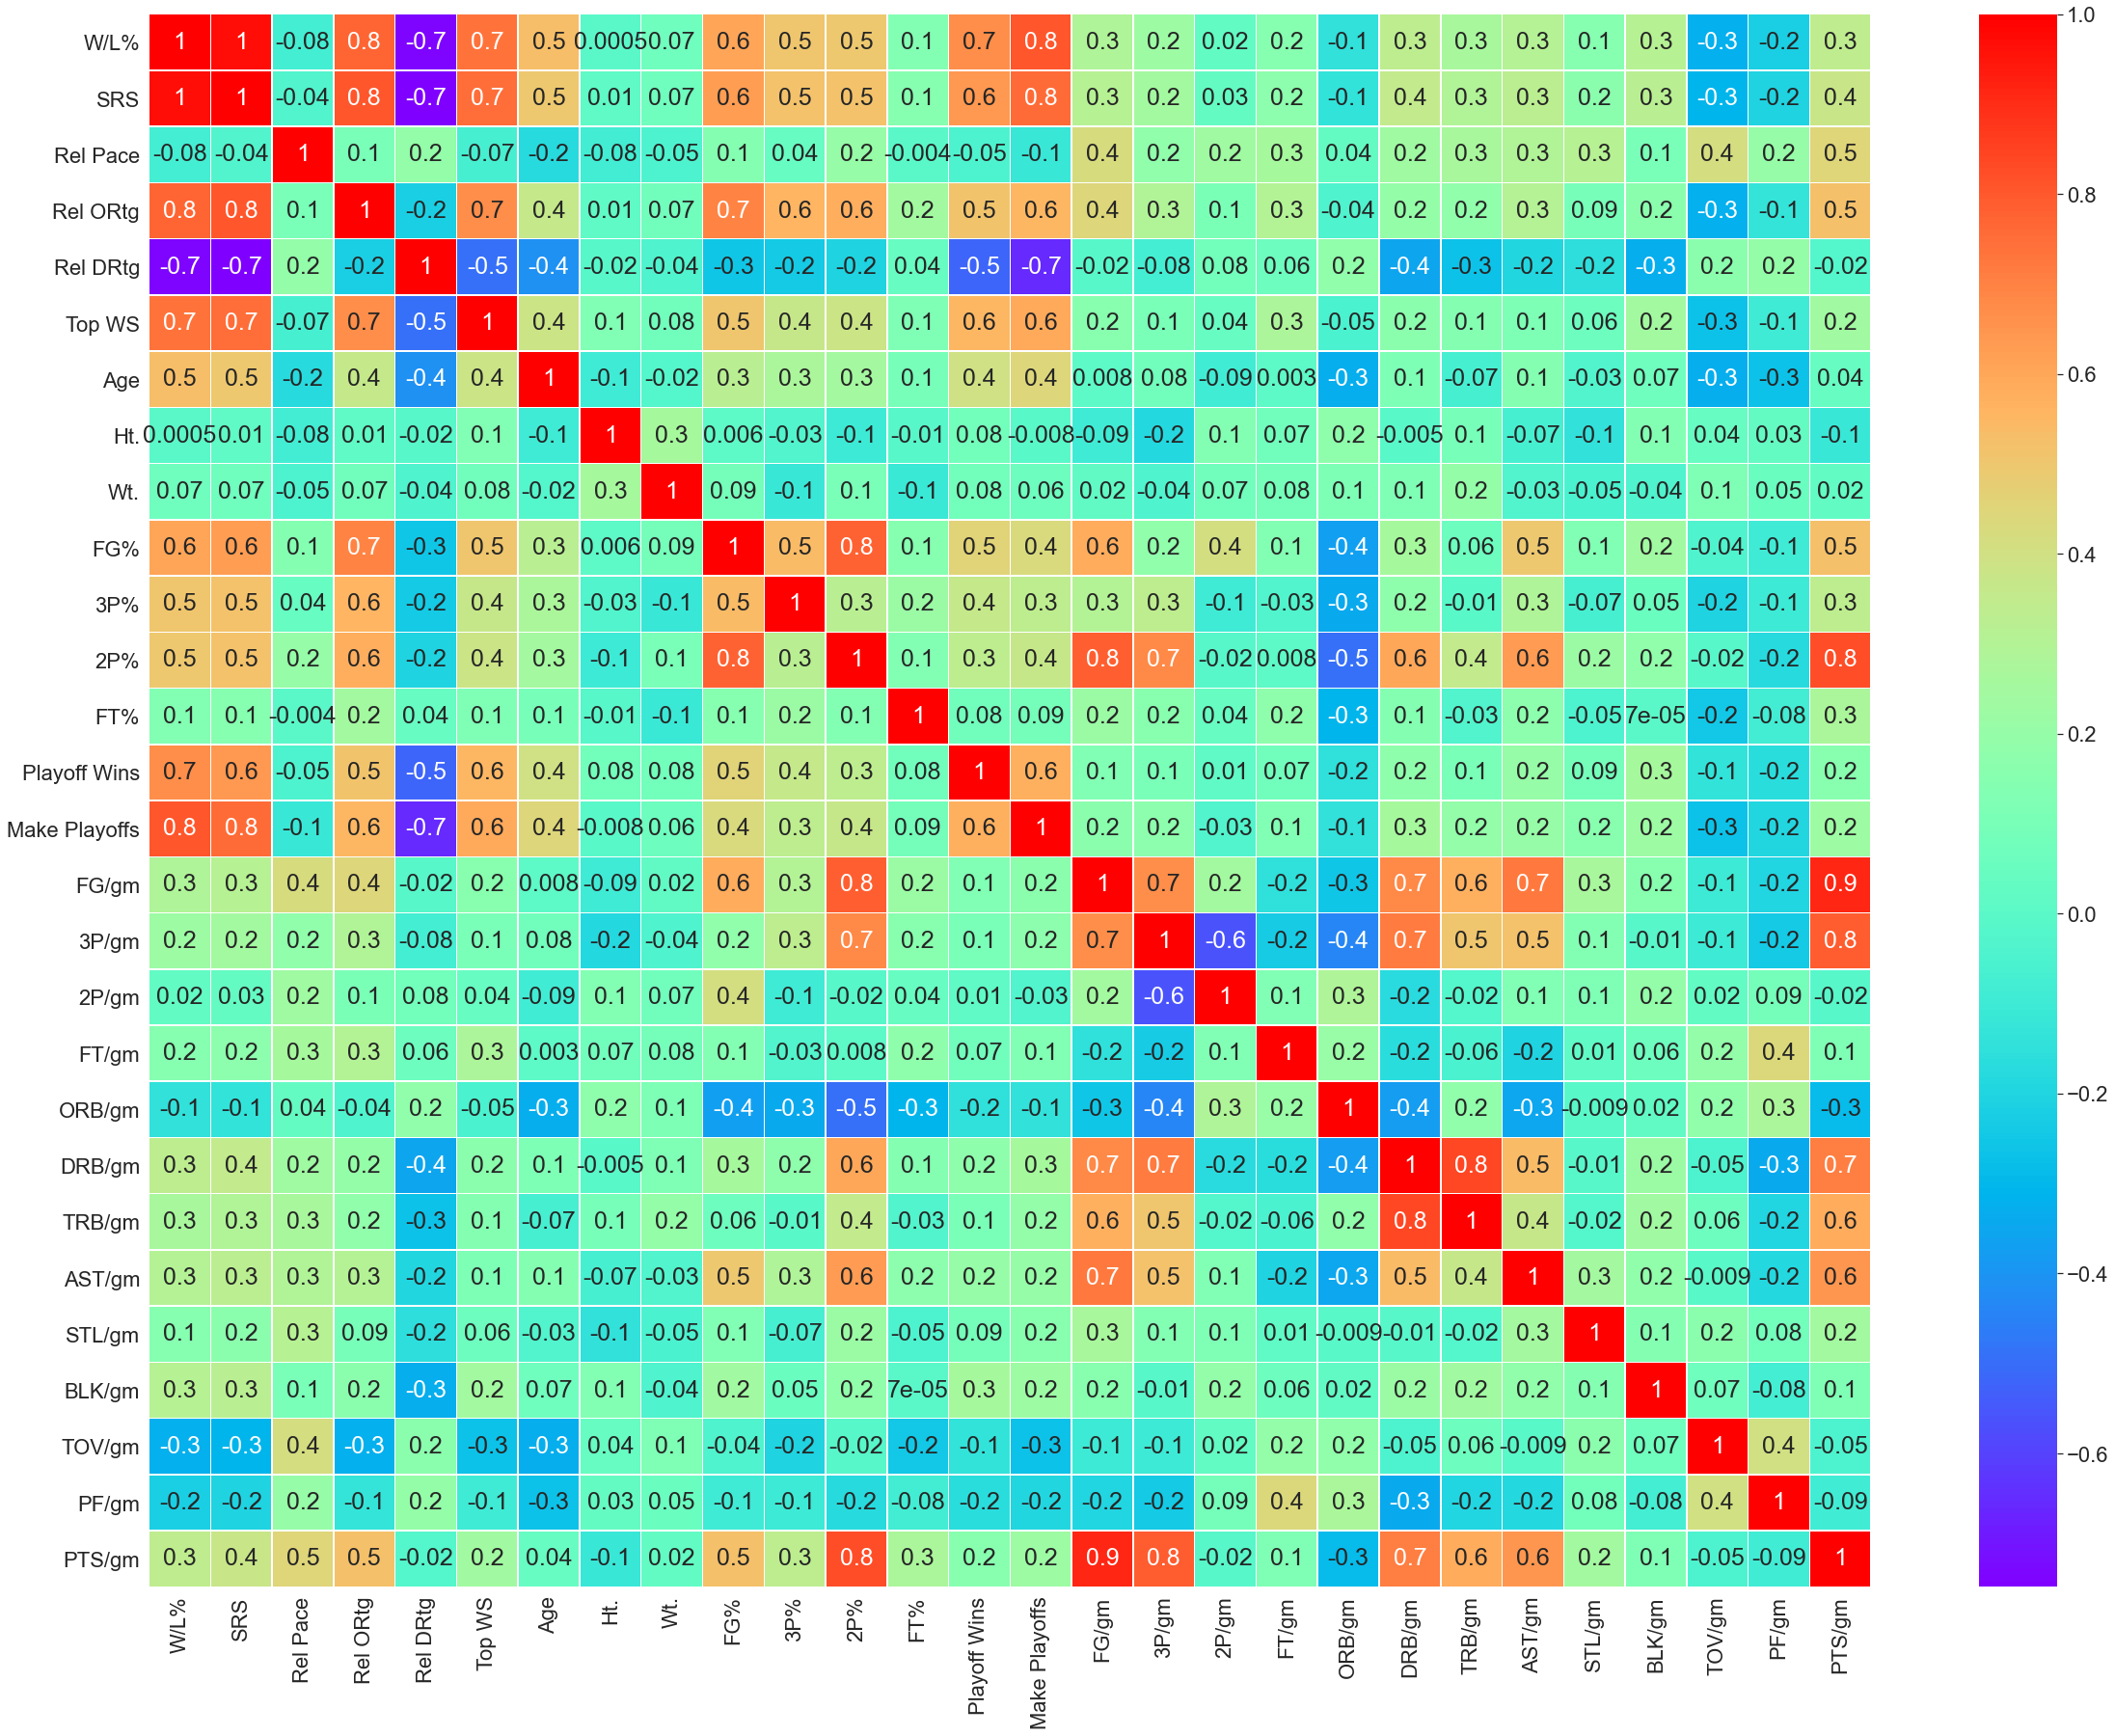

In [24]:
#Now let's create our heatmap
corr = df.drop(['Season','Team'],axis=1).corr()
plt.figure(figsize=(40,30))
sns.set(font_scale=2)
sns.heatmap(data=corr,annot=True,annot_kws={"size": 25},linewidths=.5,fmt='.1g',cmap='rainbow')

In [25]:
#Let's remove strongly correlated features, correlation >= 0.9
#We can remove either W/L% or SRS, let's remove SRS since W/L% is more highly correlated to Playoff Wins
#We can remove either PTS/gm or FG/gm
df.drop(['SRS','PTS/gm'],axis=1,inplace=True)

In [26]:
#Let's remove features weakly correlated to both make playoffs and playoff wins, correlation <=0.1
#The identified weakly correlated features are FT/gm, 2P/gm, FT%, Wt., Ht. and Rel Pace
#Let's remove these
df.drop(['FT/gm','2P/gm','FT%','Wt.','Ht.','Rel Pace'],axis=1,inplace=True)

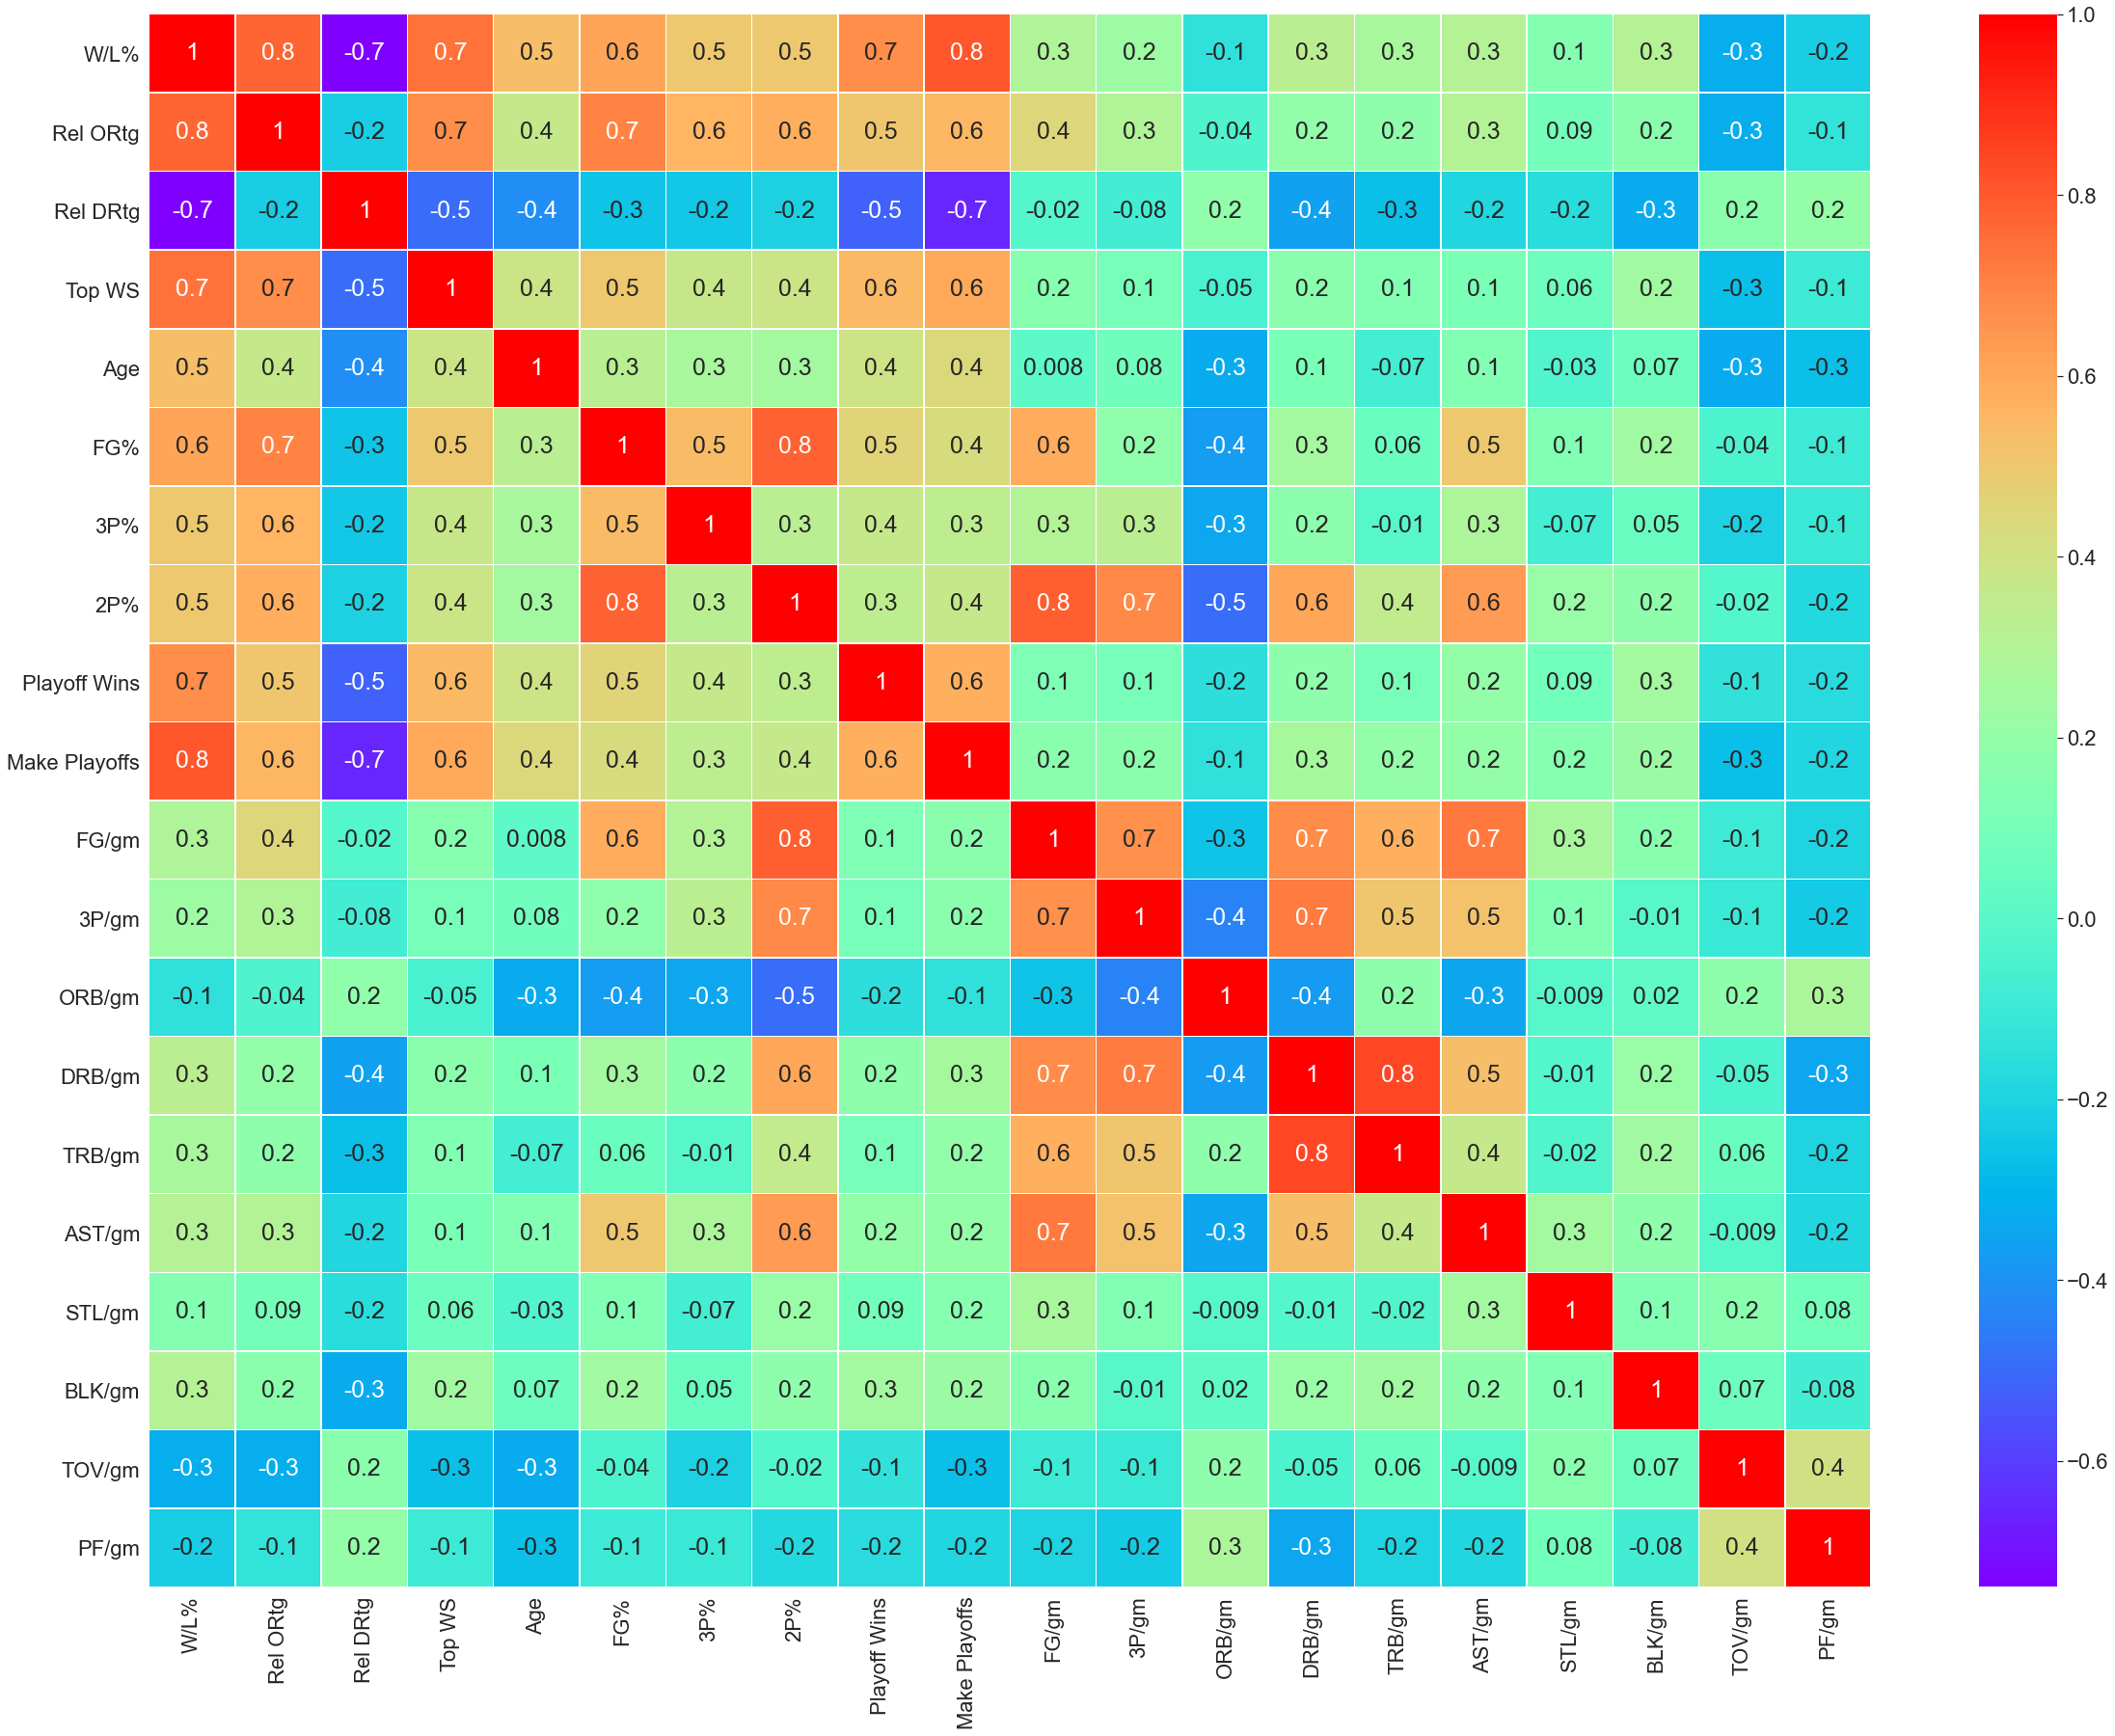

In [27]:
#Now let's look at our updated heatmap
corr = df.drop(['Season','Team'],axis=1).corr()
plt.figure(figsize=(40,30))
sns.set(font_scale=2)
sns.heatmap(data=corr,annot=True,annot_kws={"size": 25},linewidths=.5,fmt='.1g',cmap='rainbow')

In [28]:
#Now let's extract 2019-2020 data out and remove from our dataframe before we perform EDA
target_season = df[df['Season']=='2019-20']
df = df[df['Season']!='2019-20']

In [29]:
#Now we can remove Season and Team columns from our dataframes since these are not useful for our models
#Before we do that let's store our team names first
target_season_teams = target_season['Team']
target_season.drop(['Season','Team'],axis=1,inplace=True)
df.drop(['Season','Team'],axis=1,inplace=True)

In [30]:
target_season

,W/L%,Rel ORtg,Rel DRtg,Top WS,Age,FG%,3P%,2P%,Playoff Wins,Make Playoffs,FG/gm,3P/gm,ORB/gm,DRB/gm,TRB/gm,AST/gm,STL/gm,BLK/gm,TOV/gm,PF/gm
0,0.299,-3.4,4.2,5.9,24.1,0.449,0.333,0.525,0.0,0,40.641791,12.014925,9.865672,33.388060,43.253731,23.955224,7.805970,5.089552,16.208955,23.104478
16,0.667,2.7,-3.6,6.9,25.3,0.461,0.364,0.522,0.0,1,41.263889,12.569444,10.666667,35.402778,46.069444,22.986111,8.263889,5.638889,13.819444,21.569444
32,0.486,-1.7,-1.1,8.2,26.3,0.448,0.343,0.524,0.0,1,40.388889,13.069444,10.638889,37.263889,47.902778,24.458333,6.444444,4.486111,15.263889,20.972222
48,0.354,-4.3,2.7,3.6,24.3,0.434,0.352,0.489,0.0,0,37.307692,12.076923,11.000000,31.784615,42.784615,23.830769,6.584615,4.123077,14.600000,18.815385
64,0.338,-3.9,-0.8,4.0,24.4,0.447,0.348,0.511,0.0,0,39.584615,12.200000,10.461538,31.400000,41.861538,23.230769,10.030769,4.076923,15.461538,21.800000
80,0.292,-3.1,4.8,3.9,25.0,0.458,0.351,0.519,0.0,0,40.292308,11.184615,10.830769,33.415385,44.246154,23.076923,6.876923,3.246154,16.507692,18.276923
96,0.573,6.1,1.1,8.8,26.1,0.461,0.367,0.541,0.0,1,41.653333,15.146667,10.546667,36.386667,46.933333,24.653333,6.133333,4.840000,12.706667,19.493333
112,0.630,2.5,0.4,9.8,25.6,0.473,0.359,0.533,0.0,1,42.041096,10.972603,10.767123,33.369863,44.136986,26.739726,8.027397,4.616438,13.767123,20.342466
128,0.303,-1.6,2.1,5.1,25.9,0.459,0.367,0.515,0.0,0,39.318182,11.984848,9.757576,31.954545,41.712121,24.075758,7.424242,4.530303,15.272727,19.681818
144,0.231,-5.4,3.2,3.4,24.4,0.438,0.334,0.495,0.0,0,38.615385,10.430769,9.953846,32.892308,42.846154,25.584615,8.215385,4.600000,14.907692,20.061538


In [31]:
df

,W/L%,Rel ORtg,Rel DRtg,Top WS,Age,FG%,3P%,2P%,Playoff Wins,Make Playoffs,FG/gm,3P/gm,ORB/gm,DRB/gm,TRB/gm,AST/gm,STL/gm,BLK/gm,TOV/gm,PF/gm
1,0.354,-2.3,3.5,6.0,25.1,0.451,0.352,0.518,0.0,0,41.365854,13.012195,11.646341,34.451220,46.097561,25.829268,8.231707,5.109756,17.036585,23.560976
2,0.293,-3.6,2.0,5.4,25.4,0.446,0.360,0.495,0.0,0,38.170732,11.182927,9.060976,32.841463,41.902439,23.731707,7.780488,4.243902,15.560976,19.585366
3,0.524,-3.9,-3.1,8.3,27.9,0.451,0.341,0.501,2.0,1,38.085366,8.890244,10.268293,34.060976,44.329268,23.634146,8.195122,4.841463,15.780488,18.182927
4,0.585,-1.3,-5.0,10.1,28.2,0.458,0.350,0.512,4.0,1,38.634146,9.939024,8.280488,33.804878,42.085366,25.609756,9.109756,5.926829,14.951220,19.146341
5,0.732,3.3,-2.5,8.7,27.8,0.466,0.380,0.506,8.0,1,38.060976,9.975610,8.719512,31.841463,40.560976,25.743902,9.073171,4.634146,14.231707,17.768293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.232,-2.9,5.3,8.1,26.9,0.450,0.330,0.476,0.0,0,36.512195,4.817073,11.658537,28.414634,40.073171,20.012195,7.548780,4.451220,13.975610,20.475610
476,0.524,1.7,2.1,9.2,27.2,0.446,0.356,0.475,2.0,1,36.414634,7.012195,12.280488,29.317073,41.597561,19.597561,7.707317,4.768293,13.195122,19.585366
477,0.500,3.6,4.1,10.8,26.8,0.450,0.348,0.482,0.0,1,37.439024,6.841463,12.170732,29.012195,41.182927,20.243902,7.743902,4.573171,13.817073,22.231707
478,0.512,3.1,1.1,13.6,26.5,0.447,0.357,0.471,2.0,1,36.280488,6.060976,12.621951,28.585366,41.207317,18.573171,8.024390,4.134146,13.939024,22.621951


In [32]:
df.describe()

,W/L%,Rel ORtg,Rel DRtg,Top WS,Age,FG%,3P%,2P%,Playoff Wins,Make Playoffs,FG/gm,3P/gm,ORB/gm,DRB/gm,TRB/gm,AST/gm,STL/gm,BLK/gm,TOV/gm,PF/gm
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,0.500004,-0.017778,-0.026667,9.140889,26.600889,0.455364,0.356091,0.489736,2.773333,0.533333,37.630422,7.511547,10.891095,31.546975,42.438070,21.902566,7.520576,4.842302,14.365639,20.832757
std,0.152862,3.216023,3.023663,3.379002,1.682426,0.015098,0.018491,0.022350,4.322438,0.499443,2.025501,2.267963,1.234570,2.106069,2.027991,2.037870,0.847303,0.784139,1.107582,1.698090
min,0.106000,-10.100000,-8.600000,2.300000,22.700000,0.408000,0.295000,0.439000,0.000000,0.000000,32.536585,2.817073,7.646341,26.865854,36.878049,17.353659,5.536585,2.378049,11.181818,16.585366
25%,0.390000,-2.200000,-2.100000,6.700000,25.400000,0.445000,0.345000,0.474000,0.000000,0.000000,36.280488,5.975610,10.055525,29.929878,41.012195,20.500000,6.951220,4.271341,13.707317,19.612805
50%,0.512000,-0.200000,0.050000,8.750000,26.400000,0.454000,0.355500,0.487000,0.000000,1.000000,37.426829,7.159091,10.884146,31.390244,42.262195,21.646341,7.463415,4.823171,14.384146,20.707317
75%,0.610000,2.200000,2.100000,11.175000,27.600000,0.465000,0.368750,0.504000,4.000000,1.000000,38.804878,8.972561,11.792683,33.027439,43.730599,23.147727,8.118348,5.365854,15.073171,22.036585
max,0.890000,8.400000,8.200000,20.300000,31.400000,0.504000,0.416000,0.565000,16.000000,1.000000,44.048780,16.134146,14.585366,40.439024,49.731707,30.378049,10.024390,8.166667,17.719512,26.695122


C:\Users\Julian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Julian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Julian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

C:\Users\Julian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Julian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Julian\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

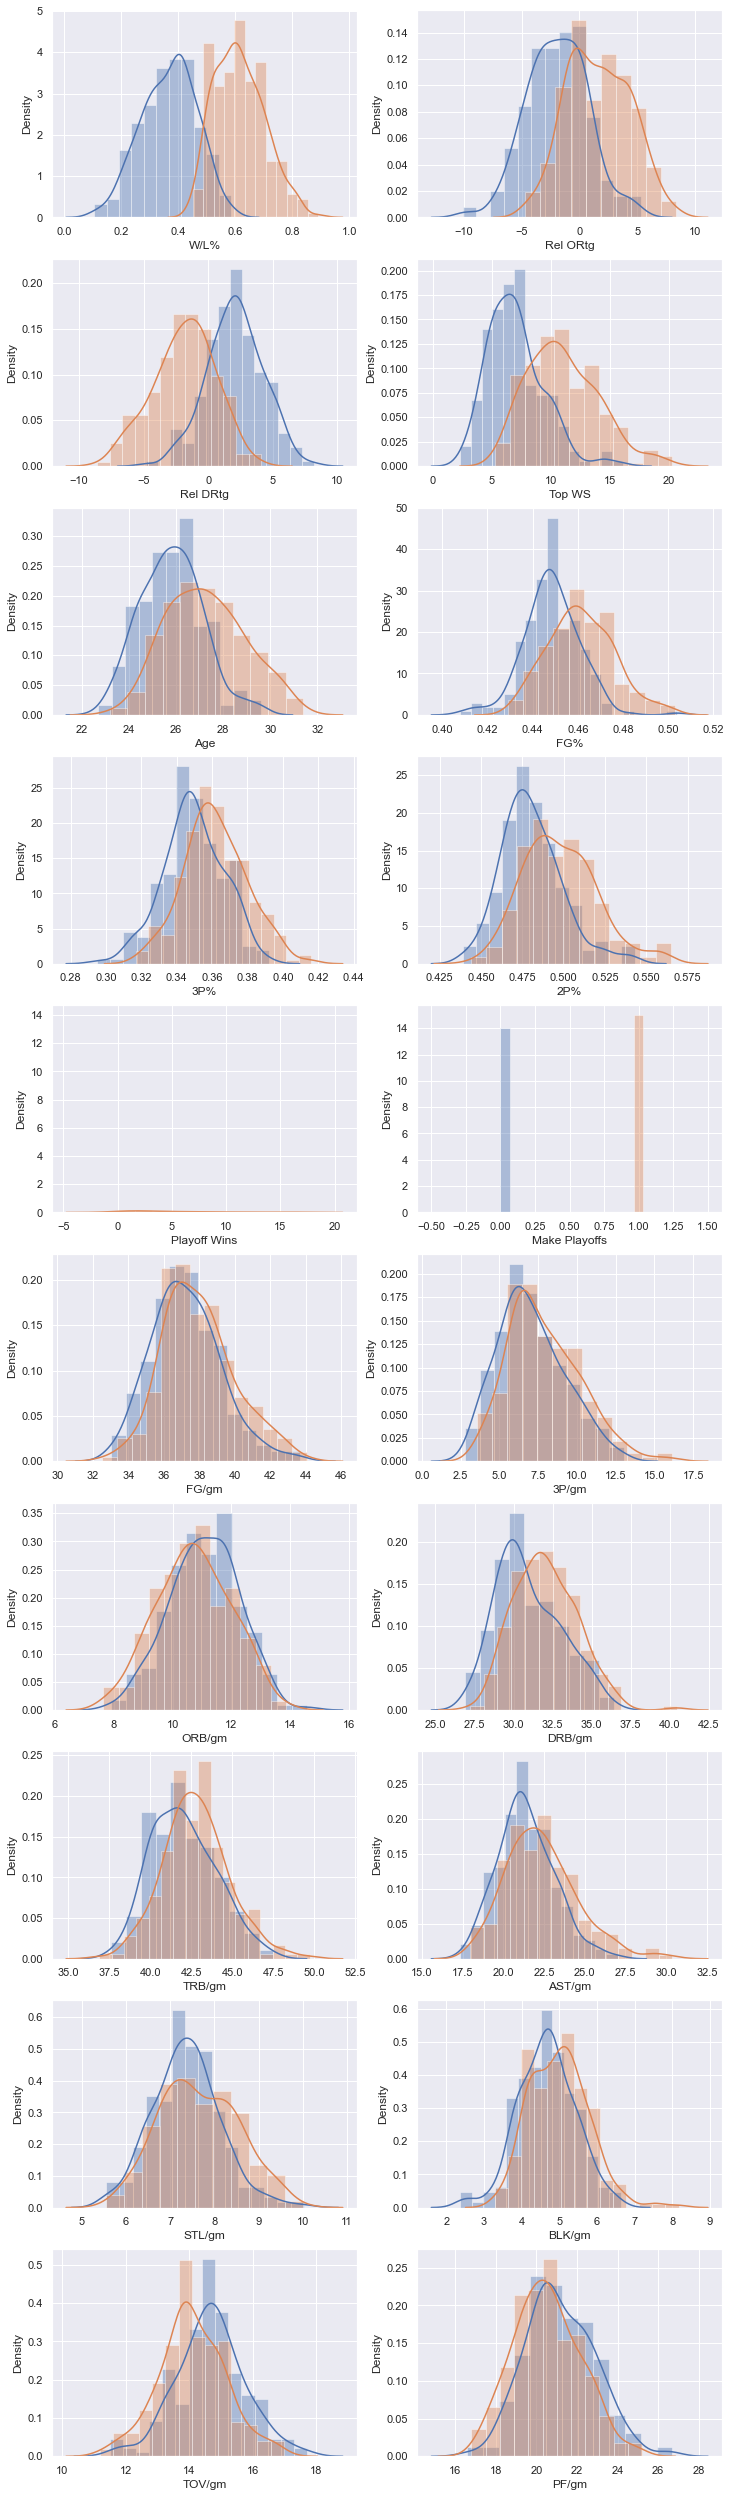

In [33]:
#Data distribution of features
sns.set_style('whitegrid')
sns.set(font_scale=1)
stats = list(df.columns)
fig, axes = plt.subplots(nrows=10,ncols=2,figsize=(12,45))
i=0
j=0
count=0
for stat in stats:
    sns.distplot(df[stat][df['Make Playoffs']==0],ax=axes[i][j])
    sns.distplot(df[stat][df['Make Playoffs']==1],ax=axes[i][j])
    j+=1
    count+=1
    if count%2==0:
        j=0
        i+=1

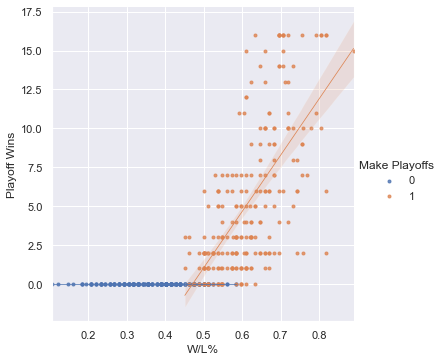

In [34]:
#It appears from our heatmap that W/L% is highly correlated to make playoffs and playoff wins
sns.set(font_scale=1, rc={"lines.linewidth": 0.5})
sns.lmplot(x='W/L%',y='Playoff Wins',data=df,hue='Make Playoffs',markers='.')

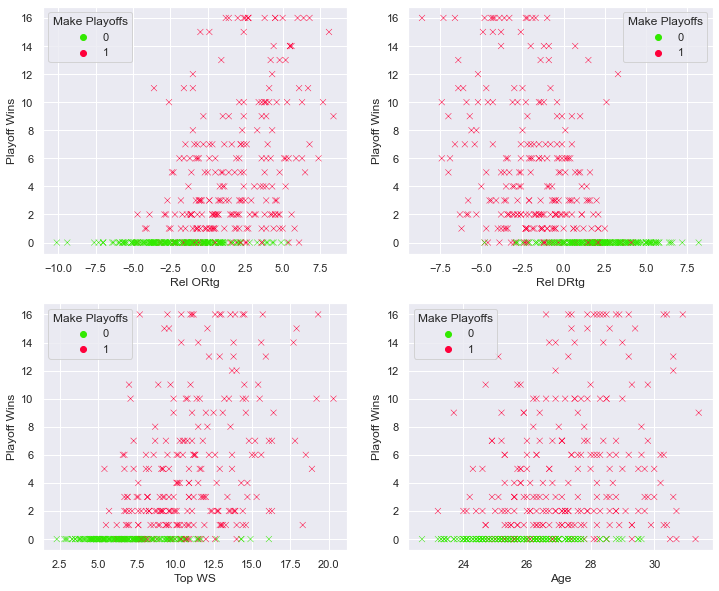

In [35]:
#Rel ORtg, Rel DRtg, Top WS, Age, FG%, 3P% and 2P% are all fairly correlated to make playoffs and playoff wins
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(12,10))
sns.scatterplot(data=df,x='Rel ORtg',y='Playoff Wins',ax=axes[0][0],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='Rel DRtg',y='Playoff Wins',ax=axes[0][1],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='Top WS',y='Playoff Wins',ax=axes[1][0],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='Age',y='Playoff Wins',ax=axes[1][1],hue='Make Playoffs',palette='prism',marker='x',alpha=1)

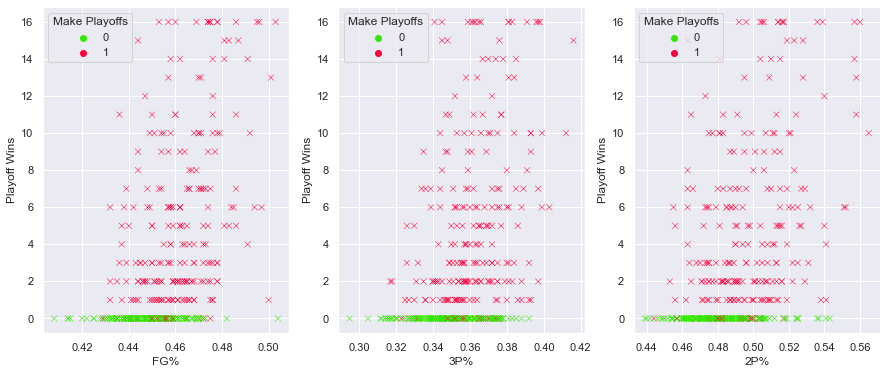

In [36]:
#It seems that a team without a Top WS player with WS of at least 5 has no chance 
#of making the playoffs let along winning a playoff game. This makes sense as a Top WS player is
#likely to be their team's star and if the star has a low WS it is highly unlikely that the team will
#make the playoffs that year.

#It can be seen that the playoff wins has a positive correlation with age, this makes sense as older
#players have more experience in the playoffs and therefore are more likely to lead their team to victory.

#Now let's have a look at FG%, 3P%, 2P%

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,6))
sns.scatterplot(data=df,x='FG%',y='Playoff Wins',ax=axes[0],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='3P%',y='Playoff Wins',ax=axes[1],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='2P%',y='Playoff Wins',ax=axes[2],hue='Make Playoffs',palette='prism',marker='x',alpha=1)

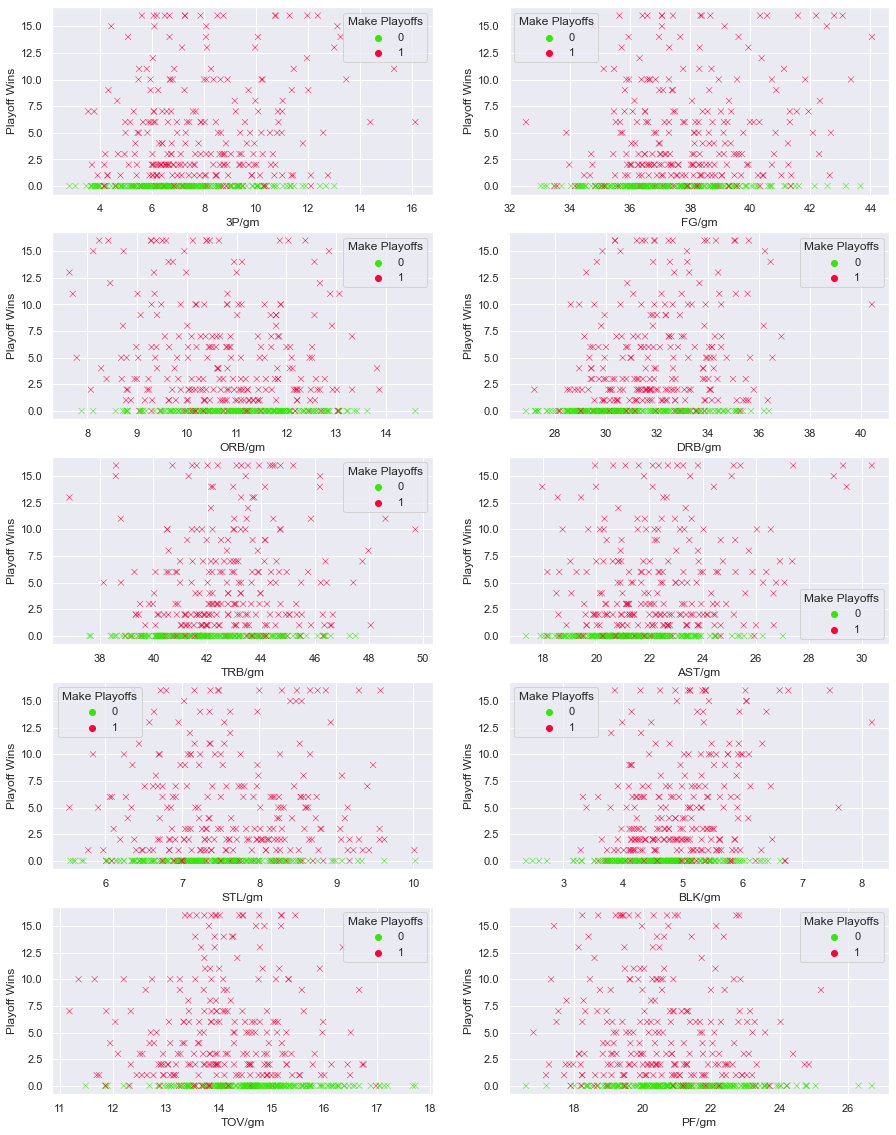

In [37]:
#All of these 3 have a positive correlation with playoff wins, these % represent the efficiency of a 
#team's offense, so it makes sense that a more efficient team is more likely to win a championship
#as they are less likely to waste possessions.
#['3P/gm','FG/gm','ORB/gm','DRB/gm','TRB/gm','AST/gm','STL/gm','BLK/gm','TOV/gm','PF/gm']
#We can also plot for features with relatively weak correlation with make playoffs and playoff wins
fig, axes = plt.subplots(nrows=5,ncols=2,figsize=(15,20))
sns.scatterplot(data=df,x='3P/gm',y='Playoff Wins',ax=axes[0][0],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='FG/gm',y='Playoff Wins',ax=axes[0][1],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='ORB/gm',y='Playoff Wins',ax=axes[1][0],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='DRB/gm',y='Playoff Wins',ax=axes[1][1],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='TRB/gm',y='Playoff Wins',ax=axes[2][0],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='AST/gm',y='Playoff Wins',ax=axes[2][1],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='STL/gm',y='Playoff Wins',ax=axes[3][0],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='BLK/gm',y='Playoff Wins',ax=axes[3][1],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='TOV/gm',y='Playoff Wins',ax=axes[4][0],hue='Make Playoffs',palette='prism',marker='x',alpha=1)
sns.scatterplot(data=df,x='PF/gm',y='Playoff Wins',ax=axes[4][1],hue='Make Playoffs',palette='prism',marker='x',alpha=1)

In [38]:
#As shown on the graph, the correlation betwen these features and the target features are very hard
#to see. We will keep these features for now, but if our models fail to perform we may consider
#removing some of these features and build our models without them.

# Predict which teams make the 2020 playoffs - Classification Problem

In [39]:
#Before we predict the winner of the 2020 playoffs, let's first see if we can use regular season data
#to predict who will be in the playoffs. Note that we are trying to do this without regular season
#wins and losses, with those we will easily be able to pick out the top 8 seeds from each conference.
#That is not the purpose of this project. This project is trying to predict teams making the playoffs
#based on regular season stats. For this reason, W/L% shall be removed from the dataframe for this part.

In [142]:
make_po_data = df.drop('W/L%',axis=1)

In [143]:
make_po_data.head()

,Rel ORtg,Rel DRtg,Top WS,Age,FG%,3P%,2P%,Playoff Wins,Make Playoffs,FG/gm,3P/gm,ORB/gm,DRB/gm,TRB/gm,AST/gm,STL/gm,BLK/gm,TOV/gm,PF/gm
1,-2.3,3.5,6.0,25.1,0.451,0.352,0.518,0.0,0,41.365854,13.012195,11.646341,34.451220,46.097561,25.829268,8.231707,5.109756,17.036585,23.560976
2,-3.6,2.0,5.4,25.4,0.446,0.360,0.495,0.0,0,38.170732,11.182927,9.060976,32.841463,41.902439,23.731707,7.780488,4.243902,15.560976,19.585366
3,-3.9,-3.1,8.3,27.9,0.451,0.341,0.501,2.0,1,38.085366,8.890244,10.268293,34.060976,44.329268,23.634146,8.195122,4.841463,15.780488,18.182927
4,-1.3,-5.0,10.1,28.2,0.458,0.350,0.512,4.0,1,38.634146,9.939024,8.280488,33.804878,42.085366,25.609756,9.109756,5.926829,14.951220,19.146341
5,3.3,-2.5,8.7,27.8,0.466,0.380,0.506,8.0,1,38.060976,9.975610,8.719512,31.841463,40.560976,25.743902,9.073171,4.634146,14.231707,17.768293


In [144]:
#For this classification problem, I will attempt to use logistic regression, K-NN, Random Forest and SVC
from sklearn.model_selection import train_test_split
X_class = make_po_data.drop(['Playoff Wins','Make Playoffs'],axis=1)
y_class = make_po_data['Make Playoffs']
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

In [145]:
#Feature scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(Xc_train)
Xc_train = scaler.transform(Xc_train)
Xc_test = scaler.transform(Xc_test)

In [146]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=300)
logmodel.fit(Xc_train,yc_train)
logpredictions = logmodel.predict(Xc_test)

In [147]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(yc_test,logpredictions))
print(confusion_matrix(yc_test,logpredictions))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82        60
           1       0.84      0.89      0.86        75

    accuracy                           0.84       135
   macro avg       0.85      0.84      0.84       135
weighted avg       0.85      0.84      0.84       135

[[47 13]
 [ 8 67]]


In [148]:
#Not bad, let's see if increasing max_iter improves the model
logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(Xc_train,yc_train)
logpredictions = logmodel.predict(Xc_test)
print(classification_report(yc_test,logpredictions))
print(confusion_matrix(yc_test,logpredictions))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82        60
           1       0.84      0.89      0.86        75

    accuracy                           0.84       135
   macro avg       0.85      0.84      0.84       135
weighted avg       0.85      0.84      0.84       135

[[47 13]
 [ 8 67]]


In [149]:
#Now let's predict teams that will make the 2020 playoffs using our target_season data
target_season_class = target_season.drop('W/L%',axis=1)

In [150]:
Xc = target_season_class.drop(['Playoff Wins','Make Playoffs'],axis=1)
yc = target_season_class['Make Playoffs']
Xc = scaler.transform(Xc)
final_log_predictions = logmodel.predict(Xc)
print(classification_report(yc,final_log_predictions))
print(confusion_matrix(yc,final_log_predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.94      0.94      0.94        16

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[13  1]
 [ 1 15]]


In [151]:
#Our logistic regression model predicts teams making the 2020 playoffs with 93% accuracy

Text(0, 0.5, 'Error Rate')

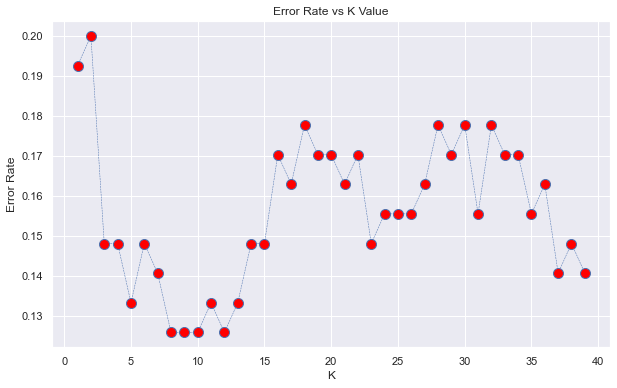

In [152]:
#K-NN Model
#Right off the bat we will use the elbow method to find the value of n_neighbors which gives the lowest
#error rate, which will correspond to the best K-NN model for this problem
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,40):
    knnmodel = KNeighborsClassifier(n_neighbors=i)
    knnmodel.fit(Xc_train,yc_train)
    pred_i = knnmodel.predict(Xc_test)
    error_rate.append(np.mean(pred_i != yc_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,ls='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [153]:
#The best K values are 8,9,10 and 12, we will choose the lowest value 8 to speed up our model
knnmodel = KNeighborsClassifier(n_neighbors=8)
knnmodel.fit(Xc_train,yc_train)
knnpredictions = knnmodel.predict(Xc_test)
print(classification_report(yc_test,knnpredictions))
print(confusion_matrix(yc_test,knnpredictions))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86        60
           1       0.89      0.88      0.89        75

    accuracy                           0.87       135
   macro avg       0.87      0.87      0.87       135
weighted avg       0.87      0.87      0.87       135

[[52  8]
 [ 9 66]]


In [154]:
#This performed better than the logistic regression model with the test data, what about the 2020 data?
final_knn_predictions = knnmodel.predict(Xc)
print(classification_report(yc,final_knn_predictions))
print(confusion_matrix(yc,final_knn_predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.88      0.90        16

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

[[13  1]
 [ 2 14]]


In [155]:
#Even though our K-NN model performed better than the logistic regression model for our test data,
#it had an accuracry 3% lower than the logistic regression model for predicting 2020 playoffs

In [156]:
#Random Forest
#Starting with n=200
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(n_estimators=200)
rfmodel.fit(Xc_train,yc_train)
rfpredictions = rfmodel.predict(Xc_test)
print(classification_report(yc_test,rfpredictions))
print(confusion_matrix(yc_test,rfpredictions))

              precision    recall  f1-score   support

           0       0.86      0.73      0.79        60
           1       0.81      0.91      0.86        75

    accuracy                           0.83       135
   macro avg       0.84      0.82      0.82       135
weighted avg       0.83      0.83      0.83       135

[[44 16]
 [ 7 68]]


In [157]:
#Does changing n improve the model?
rfmodel = RandomForestClassifier(n_estimators=1000)
rfmodel.fit(Xc_train,yc_train)
rfpredictions = rfmodel.predict(Xc_test)
print(classification_report(yc_test,rfpredictions))
print(confusion_matrix(yc_test,rfpredictions))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81        60
           1       0.83      0.89      0.86        75

    accuracy                           0.84       135
   macro avg       0.84      0.83      0.83       135
weighted avg       0.84      0.84      0.84       135

[[46 14]
 [ 8 67]]


In [158]:
#Not really, let's just stick with n = 200
rfmodel = RandomForestClassifier(n_estimators=200)
rfmodel.fit(Xc_train,yc_train)
rfpredictions = rfmodel.predict(Xc_test)
final_rf_predictions = rfmodel.predict(Xc)
print(classification_report(yc,final_rf_predictions))
print(confusion_matrix(yc,final_rf_predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[14  0]
 [ 1 15]]


In [159]:
#Our random forest model outperformed logistic regression and K-NN for our target data

In [160]:
#SVC Model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid = GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(Xc_train,yc_train)
grid.best_params_	
grid.best_estimator_
grid_predictions = grid.predict(Xc_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(yc_test,grid_predictions))
print(classification_report(yc_test,grid_predictions))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.889, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.810, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.921, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.873, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.794, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.667, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=10, gamma=1, score=0.873, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.857, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.857, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.952, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.857, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.952, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=0.889, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[CV] .................. C=1000, gamma=0.01, score=0.921, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.857, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.952, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.889, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.857, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.937, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.825, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.3s finished


In [161]:
final_SVC_predictions = grid.predict(Xc)
print(classification_report(yc,final_SVC_predictions))
print(confusion_matrix(yc,final_SVC_predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.88      0.93        16

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

[[14  0]
 [ 2 14]]


In [ ]:
#Finally we will use a deep learning model to see if we can improve our accuracy to 100%

Epoch 1/600
4/4 [==============================] - 0s 22ms/step - loss: 0.7009 - val_loss: 0.7180
Epoch 2/600
4/4 [==============================] - 0s 4ms/step - loss: 0.7339 - val_loss: 0.7160
Epoch 3/600
4/4 [==============================] - 0s 4ms/step - loss: 0.7034 - val_loss: 0.7140
Epoch 4/600
4/4 [==============================] - 0s 4ms/step - loss: 0.7083 - val_loss: 0.7119
Epoch 5/600
4/4 [==============================] - 0s 4ms/step - loss: 0.7048 - val_loss: 0.7098
Epoch 6/600
4/4 [==============================] - 0s 3ms/step - loss: 0.6970 - val_loss: 0.7074
Epoch 7/600
4/4 [==============================] - 0s 3ms/step - loss: 0.7148 - val_loss: 0.7046
Epoch 8/600
4/4 [==============================] - 0s 4ms/step - loss: 0.6830 - val_loss: 0.7019
Epoch 9/600
4/4 [==============================] - 0s 3ms/step - loss: 0.7066 - val_loss: 0.6986
Epoch 10/600
4/4 [==============================] - 0s 4ms/step - loss: 0.6822 - val_loss: 0.6951
Epoch 11/600
4/4 [==========

4/4 [==============================] - 0s 4ms/step - loss: 0.5278 - val_loss: 0.5182
Epoch 85/600
4/4 [==============================] - 0s 3ms/step - loss: 0.5418 - val_loss: 0.5144
Epoch 86/600
4/4 [==============================] - 0s 3ms/step - loss: 0.5756 - val_loss: 0.5100
Epoch 87/600
4/4 [==============================] - 0s 3ms/step - loss: 0.5580 - val_loss: 0.5076
Epoch 88/600
4/4 [==============================] - 0s 3ms/step - loss: 0.5513 - val_loss: 0.5060
Epoch 89/600
4/4 [==============================] - 0s 4ms/step - loss: 0.5494 - val_loss: 0.5046
Epoch 90/600
4/4 [==============================] - 0s 3ms/step - loss: 0.5365 - val_loss: 0.5030
Epoch 91/600
4/4 [==============================] - 0s 3ms/step - loss: 0.5538 - val_loss: 0.4998
Epoch 92/600
4/4 [==============================] - 0s 3ms/step - loss: 0.5337 - val_loss: 0.4976
Epoch 93/600
4/4 [==============================] - 0s 4ms/step - loss: 0.5561 - val_loss: 0.4936
Epoch 94/600
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.4490 - val_loss: 0.3783
Epoch 168/600
4/4 [==============================] - 0s 4ms/step - loss: 0.3769 - val_loss: 0.3785
Epoch 169/600
4/4 [==============================] - 0s 3ms/step - loss: 0.4127 - val_loss: 0.3780
Epoch 170/600
4/4 [==============================] - 0s 4ms/step - loss: 0.4258 - val_loss: 0.3771
Epoch 171/600
4/4 [==============================] - 0s 3ms/step - loss: 0.3878 - val_loss: 0.3762
Epoch 172/600
4/4 [==============================] - 0s 3ms/step - loss: 0.4329 - val_loss: 0.3762
Epoch 173/600
4/4 [==============================] - 0s 3ms/step - loss: 0.4041 - val_loss: 0.3744
Epoch 174/600
4/4 [==============================] - 0s 3ms/step - loss: 0.4262 - val_loss: 0.3721
Epoch 175/600
4/4 [==============================] - 0s 3ms/step - loss: 0.4199 - val_loss: 0.3715
Epoch 176/600
4/4 [==============================] - 0s 4ms/step - loss: 0.4231 - val_loss: 0.3724
Epoch 177/600
4/4 [=====

Epoch 250/600
4/4 [==============================] - 0s 3ms/step - loss: 0.3593 - val_loss: 0.3512
Epoch 251/600
4/4 [==============================] - 0s 4ms/step - loss: 0.3573 - val_loss: 0.3521
Epoch 252/600
4/4 [==============================] - 0s 3ms/step - loss: 0.3549 - val_loss: 0.3530
Epoch 253/600
4/4 [==============================] - 0s 4ms/step - loss: 0.3713 - val_loss: 0.3545
Epoch 254/600
4/4 [==============================] - 0s 3ms/step - loss: 0.4043 - val_loss: 0.3521
Epoch 255/600
4/4 [==============================] - 0s 3ms/step - loss: 0.4273 - val_loss: 0.3508
Epoch 256/600
4/4 [==============================] - 0s 3ms/step - loss: 0.3822 - val_loss: 0.3495
Epoch 257/600
4/4 [==============================] - 0s 3ms/step - loss: 0.3693 - val_loss: 0.3490
Epoch 258/600
4/4 [==============================] - 0s 3ms/step - loss: 0.3694 - val_loss: 0.3482
Epoch 259/600
4/4 [==============================] - 0s 3ms/step - loss: 0.3204 - val_loss: 0.3484
Epoch 260/

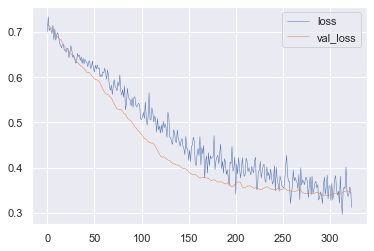

In [191]:
#Deep Learning Model - 17/8/1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
import logging
import os
import statistics
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
logging.getLogger('tensorflow').setLevel(logging.FATAL) #Code to disable tensorflow warnings

dlcmodel = Sequential()
dlcmodel.add(Dense(17,activation='relu'))
dlcmodel.add(Dropout(0.5))
dlcmodel.add(Dense(8,activation='relu'))
dlcmodel.add(Dropout(0.5))
dlcmodel.add(Dense(1,activation='sigmoid'))
dlcmodel.compile(optimizer='adam',loss='binary_crossentropy')

early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

dlcmodel.fit(x=Xc_train,y=yc_train,batch_size=100,epochs=600,validation_data=(Xc_test,yc_test),callbacks=[early_stop])

losses = pd.DataFrame(dlcmodel.history.history)
losses.plot()


In [193]:
final_dlc_predictions = dlcmodel.predict_classes(Xc)
print(classification_report(yc,final_dlc_predictions))
print(confusion_matrix(yc,final_dlc_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[14  0]
 [ 0 16]]


In [209]:
from tensorflow.keras.models import load_model
dlcmodel.save('my_dlc_model.h5')

In [ ]:
#Classification Summary for predicting teams making playoffs 2020
#Logistic Regression: 93% accuracy
#K-NN: 90% accuracy
#Random Forest: 97% accuracy
#SVC: 93% accuracy
#Deep Learning: 100% accuracy

# Predicting 2020 Playoffs Winner - Multivariate Linear Regression Problem

In [61]:
df.head()

,W/L%,Rel ORtg,Rel DRtg,Top WS,Age,FG%,3P%,2P%,Playoff Wins,Make Playoffs,FG/gm,3P/gm,ORB/gm,DRB/gm,TRB/gm,AST/gm,STL/gm,BLK/gm,TOV/gm,PF/gm
1,0.354,-2.3,3.5,6.0,25.1,0.451,0.352,0.518,0.0,0,41.365854,13.012195,11.646341,34.451220,46.097561,25.829268,8.231707,5.109756,17.036585,23.560976
2,0.293,-3.6,2.0,5.4,25.4,0.446,0.360,0.495,0.0,0,38.170732,11.182927,9.060976,32.841463,41.902439,23.731707,7.780488,4.243902,15.560976,19.585366
3,0.524,-3.9,-3.1,8.3,27.9,0.451,0.341,0.501,2.0,1,38.085366,8.890244,10.268293,34.060976,44.329268,23.634146,8.195122,4.841463,15.780488,18.182927
4,0.585,-1.3,-5.0,10.1,28.2,0.458,0.350,0.512,4.0,1,38.634146,9.939024,8.280488,33.804878,42.085366,25.609756,9.109756,5.926829,14.951220,19.146341
5,0.732,3.3,-2.5,8.7,27.8,0.466,0.380,0.506,8.0,1,38.060976,9.975610,8.719512,31.841463,40.560976,25.743902,9.073171,4.634146,14.231707,17.768293


In [62]:
#As mentioned before, I will start by not removing weakly correlated features 
#unless our models fail to perform.
#For this linear regression problem, I will compare Ordinary Least Squares, Lasso, xxx, xxx
Xlin = df.drop(['Playoff Wins','Make Playoffs'],axis=1)
ylin = df['Playoff Wins']
Xlin_train, Xlin_test, ylin_train, ylin_test = train_test_split(Xlin, ylin, test_size=0.3, random_state=42)

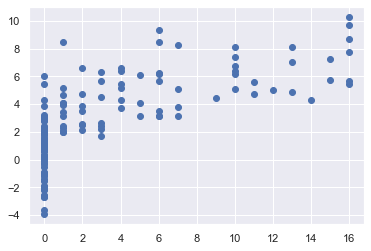

In [63]:
#Ordinary Least Squares
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xlin_train,ylin_train)
lrpredictions = lr.predict(Xlin_test)
plt.scatter(ylin_test,lrpredictions)

In [64]:
#It looks like we should remove the teams that weren't in the playoffs
#This should be easy since we have a make playoffs column, let's redefine our Xlin and ylin
playoff_wins_df = df[df['Make Playoffs'] == 1]
playoff_wins_df.head()
Xlin = playoff_wins_df.drop(['Playoff Wins','Make Playoffs'],axis=1)
ylin = playoff_wins_df['Playoff Wins']
Xlin_train, Xlin_test, ylin_train, ylin_test = train_test_split(Xlin, ylin, test_size=0.3, random_state=42)

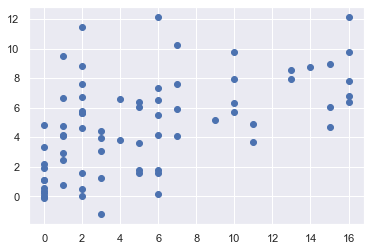

In [65]:
lr = LinearRegression()
lr.fit(Xlin_train,ylin_train)
lrpredictions = lr.predict(Xlin_test)
plt.scatter(ylin_test,lrpredictions)

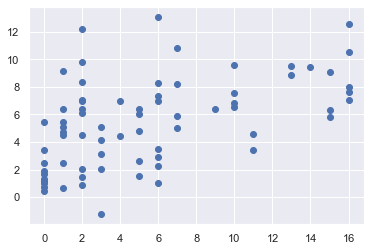

In [66]:
#Even though this isn't as straight a line as I'd hoped, it's still much better than what we had before
#Let's try removing those weak correlated features
removed_weak = playoff_wins_df.drop(['3P/gm','FG/gm','ORB/gm','DRB/gm','TRB/gm',
 'AST/gm','STL/gm','BLK/gm','TOV/gm','PF/gm'],axis=1)
Xlin = removed_weak.drop(['Playoff Wins','Make Playoffs'],axis=1)
ylin = removed_weak['Playoff Wins']
Xlin_train, Xlin_test, ylin_train, ylin_test = train_test_split(Xlin, ylin, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(Xlin_train,ylin_train)
lrpredictions = lr.predict(Xlin_test)
plt.scatter(ylin_test,lrpredictions)

In [67]:
#It doesn't seem to have improved our model, so let's just go ahead and put those features back in for
#a more complete model
Xlin = playoff_wins_df.drop(['Playoff Wins','Make Playoffs'],axis=1)
ylin = playoff_wins_df['Playoff Wins']
Xlin_train, Xlin_test, ylin_train, ylin_test = train_test_split(Xlin, ylin, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(Xlin_train,ylin_train)
lrpredictions = lr.predict(Xlin_test)
from sklearn import metrics
print('MAE = ' + str(metrics.mean_absolute_error(ylin_test, lrpredictions)))
print('MSE = ' + str(metrics.mean_squared_error(ylin_test, lrpredictions)))
print('RMSE = ' + str(np.sqrt(metrics.mean_squared_error(ylin_test, lrpredictions))))

MAE = 3.430782478237103
MSE = 18.973442475951217
RMSE = 4.355851521338993


In [68]:
Xl = target_season.drop(['Playoff Wins','Make Playoffs'],axis=1)
yl = target_season['Make Playoffs']
final_lr_predictions = lr.predict(Xl)
lrranking = pd.DataFrame(final_lr_predictions,index=target_season_teams)
lrranking.reset_index(inplace=True)

In [69]:
lrranking.rename(columns={0:'Playoff Wins'},inplace=True)
lrmerged = pd.merge(lrranking,target_season.reset_index(drop=True)['Make Playoffs'],left_index=True,right_index=True)

In [70]:
lrmerged.set_index(keys='Team',inplace=True)
lrmerged.sort_values(by='Playoff Wins',ascending=False,inplace=True)

In [71]:
#This is the predictions made by our linear regression model, the model predicts that the Bucks
#will win the 2020 playoffs, closely followed by the Lakers. Well, we already know the Bucks got whooped
#by the Miami Heat (written on 2020/09/23), so the next winner prediction is the Lakers, boo.
#We can see that our max playoff games won is not 16, which is the number of games that would be won
#if a team were to win the playoffs.
#I will therefore take our predictions as a probability out of 16 for a team to win the playoffs.
#I will set all negative values to 0, I will also set teams not in the playoffs to have 0 wins and
#remove them from the dataframe.
#It is also worth noting that our model correctly predicted the top 15 teams which all made it
#to the playoffs, the oulier being Orlando Magic. 
def set_neg_to_zero(num):
    if num < 0:
        return 0
    else:
        return num
    
lrmerged['Playoff Wins'] = lrmerged['Playoff Wins'].apply(lambda x: set_neg_to_zero(x))

In [72]:
for i in range(0,30):
    if lrmerged.loc[lrmerged.index[i],'Make Playoffs'] == 0:
        lrmerged.loc[lrmerged.index[i],'Playoff Wins'] = 0

In [73]:
lrmerged['Win Probability'] = lrmerged['Playoff Wins'].apply(lambda x: x/16)

In [74]:
lrmerged

,Playoff Wins,Make Playoffs,Win Probability
Team,,,
Milwaukee Bucks,11.846197,1,0.740387
Los Angeles Lakers,10.246535,1,0.640408
Toronto Raptors,8.235664,1,0.514729
Los Angeles Clippers,7.853798,1,0.490862
Utah Jazz,6.080309,1,0.380019
Denver Nuggets,6.063923,1,0.378995
Boston Celtics,5.341286,1,0.333830
Indiana Pacers,4.886431,1,0.305402
Houston Rockets,4.879929,1,0.304996


In [75]:
#Great! Now we can repeat this code for other regression models and compare the results

In [76]:
#Lasso Model
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=5,random_state=101)
lasso.fit(Xlin_train,ylin_train)
lassopredictions = lasso.predict(Xlin_test)

print('MAE = ' + str(metrics.mean_absolute_error(ylin_test, lassopredictions)))
print('MSE = ' + str(metrics.mean_squared_error(ylin_test, lassopredictions)))
print('RMSE = ' + str(np.sqrt(metrics.mean_squared_error(ylin_test, lassopredictions))))

final_lasso_predictions = lasso.predict(Xl)
lassoranking = pd.DataFrame(final_lasso_predictions,index=target_season_teams)
lassoranking.reset_index(inplace=True)
lassoranking.rename(columns={0:'Playoff Wins'},inplace=True)
lassomerged = pd.merge(lassoranking,target_season.reset_index(drop=True)['Make Playoffs'],left_index=True,right_index=True)
lassomerged.set_index(keys='Team',inplace=True)
lassomerged.sort_values(by='Playoff Wins',ascending=False,inplace=True)
lassomerged['Playoff Wins'] = lassomerged['Playoff Wins'].apply(lambda x: set_neg_to_zero(x))
for i in range(0,30):
    if lassomerged.loc[lassomerged.index[i],'Make Playoffs'] == 0:
        lassomerged.loc[lassomerged.index[i],'Playoff Wins'] = 0
lassomerged['Win Probability'] = lassomerged['Playoff Wins'].apply(lambda x: x/16)
lassomerged

MAE = 3.5119831054949984
MSE = 18.81638575196586
RMSE = 4.33778581213571


,Playoff Wins,Make Playoffs,Win Probability
Team,,,
Milwaukee Bucks,12.059801,1,0.753738
Los Angeles Lakers,10.263572,1,0.641473
Toronto Raptors,8.462766,1,0.528923
Los Angeles Clippers,7.755934,1,0.484746
Utah Jazz,5.945396,1,0.371587
Houston Rockets,5.865489,1,0.366593
Boston Celtics,5.789646,1,0.361853
Denver Nuggets,5.345793,1,0.334112
Miami Heat,5.327418,1,0.332964


In [195]:
#Deep Learning - relu - 18/18/18/1
dl_scaler = MinMaxScaler()
Xdl_train = dl_scaler.fit_transform(Xlin_train)
Xdl_test = dl_scaler.transform(Xlin_test)
Xdl_train.shape

(168, 18)

Epoch 1/1000
2/2 [==============================] - 0s 46ms/step - loss: 47.7540 - val_loss: 55.2523
Epoch 2/1000
2/2 [==============================] - 0s 5ms/step - loss: 47.4812 - val_loss: 55.0250
Epoch 3/1000
2/2 [==============================] - 0s 6ms/step - loss: 47.4084 - val_loss: 54.8271
Epoch 4/1000
2/2 [==============================] - 0s 6ms/step - loss: 46.8559 - val_loss: 54.6299
Epoch 5/1000
2/2 [==============================] - 0s 6ms/step - loss: 46.8996 - val_loss: 54.4334
Epoch 6/1000
2/2 [==============================] - 0s 6ms/step - loss: 46.6226 - val_loss: 54.2289
Epoch 7/1000
2/2 [==============================] - 0s 6ms/step - loss: 46.5055 - val_loss: 54.0233
Epoch 8/1000
2/2 [==============================] - 0s 6ms/step - loss: 46.2819 - val_loss: 53.8046
Epoch 9/1000
2/2 [==============================] - 0s 6ms/step - loss: 46.0549 - val_loss: 53.5677
Epoch 10/1000
2/2 [==============================] - 0s 6ms/step - loss: 45.8010 - val_loss: 53.300

2/2 [==============================] - 0s 6ms/step - loss: 19.5696 - val_loss: 24.1119
Epoch 83/1000
2/2 [==============================] - 0s 6ms/step - loss: 20.6131 - val_loss: 24.0376
Epoch 84/1000
2/2 [==============================] - 0s 6ms/step - loss: 18.7903 - val_loss: 23.9819
Epoch 85/1000
2/2 [==============================] - 0s 6ms/step - loss: 18.9326 - val_loss: 23.9150
Epoch 86/1000
2/2 [==============================] - 0s 6ms/step - loss: 18.4783 - val_loss: 23.8262
Epoch 87/1000
2/2 [==============================] - 0s 6ms/step - loss: 18.8889 - val_loss: 23.7454
Epoch 88/1000
2/2 [==============================] - 0s 6ms/step - loss: 19.6415 - val_loss: 23.6406
Epoch 89/1000
2/2 [==============================] - 0s 6ms/step - loss: 19.1611 - val_loss: 23.5428
Epoch 90/1000
2/2 [==============================] - 0s 6ms/step - loss: 20.7321 - val_loss: 23.4477
Epoch 91/1000
2/2 [==============================] - 0s 6ms/step - loss: 19.5991 - val_loss: 23.3407
Epoc

2/2 [==============================] - 0s 5ms/step - loss: 14.4614 - val_loss: 19.1386
Epoch 163/1000
2/2 [==============================] - 0s 6ms/step - loss: 13.7132 - val_loss: 19.1058
Epoch 164/1000
2/2 [==============================] - 0s 6ms/step - loss: 11.1891 - val_loss: 19.0407
Epoch 165/1000
2/2 [==============================] - 0s 6ms/step - loss: 11.8991 - val_loss: 18.9942
Epoch 166/1000
2/2 [==============================] - 0s 6ms/step - loss: 11.7971 - val_loss: 18.9480
Epoch 167/1000
2/2 [==============================] - 0s 6ms/step - loss: 12.8009 - val_loss: 18.8860
Epoch 168/1000
2/2 [==============================] - 0s 6ms/step - loss: 15.6698 - val_loss: 18.8765
Epoch 169/1000
2/2 [==============================] - 0s 6ms/step - loss: 14.4912 - val_loss: 18.9013
Epoch 170/1000
2/2 [==============================] - 0s 5ms/step - loss: 13.0522 - val_loss: 18.9136
Epoch 171/1000
2/2 [==============================] - 0s 6ms/step - loss: 13.4924 - val_loss: 18.

2/2 [==============================] - 0s 6ms/step - loss: 12.0544 - val_loss: 18.6203
Epoch 243/1000
2/2 [==============================] - 0s 6ms/step - loss: 13.9172 - val_loss: 18.4803
Epoch 244/1000
2/2 [==============================] - 0s 6ms/step - loss: 14.6801 - val_loss: 18.3795
Epoch 245/1000
2/2 [==============================] - 0s 6ms/step - loss: 13.6483 - val_loss: 18.3364
Epoch 246/1000
2/2 [==============================] - 0s 6ms/step - loss: 13.2225 - val_loss: 18.3731
Epoch 247/1000
2/2 [==============================] - 0s 6ms/step - loss: 11.3988 - val_loss: 18.4207
Epoch 248/1000
2/2 [==============================] - 0s 6ms/step - loss: 11.6705 - val_loss: 18.4605
Epoch 249/1000
2/2 [==============================] - 0s 6ms/step - loss: 12.8180 - val_loss: 18.5182
Epoch 250/1000
2/2 [==============================] - 0s 6ms/step - loss: 11.3218 - val_loss: 18.5009
Epoch 251/1000
2/2 [==============================] - 0s 6ms/step - loss: 13.8848 - val_loss: 18.

2/2 [==============================] - 0s 7ms/step - loss: 11.5346 - val_loss: 18.3290
Epoch 323/1000
2/2 [==============================] - 0s 6ms/step - loss: 12.9853 - val_loss: 18.3387
Epoch 324/1000
2/2 [==============================] - 0s 6ms/step - loss: 13.3875 - val_loss: 18.2971
Epoch 325/1000
2/2 [==============================] - 0s 6ms/step - loss: 11.5189 - val_loss: 18.2283
Epoch 326/1000
2/2 [==============================] - 0s 5ms/step - loss: 12.2706 - val_loss: 18.2149
Epoch 327/1000
2/2 [==============================] - 0s 5ms/step - loss: 9.9759 - val_loss: 18.1537
Epoch 328/1000
2/2 [==============================] - 0s 6ms/step - loss: 12.9092 - val_loss: 18.1439
Epoch 329/1000
2/2 [==============================] - 0s 6ms/step - loss: 11.2087 - val_loss: 18.1377
Epoch 330/1000
2/2 [==============================] - 0s 6ms/step - loss: 11.2444 - val_loss: 18.1866
Epoch 331/1000
2/2 [==============================] - 0s 6ms/step - loss: 13.0483 - val_loss: 18.2

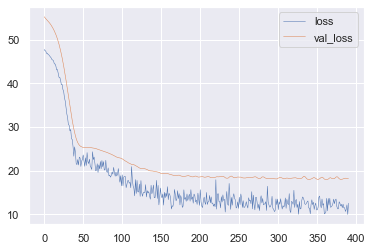

In [205]:
#There are 18 features
#Will repeat model 10 times and summarize performance, then use last iterated model to predict
#Goal is to systematically configure neural network with metrics lower than both linear regression 
#and lasso regression

dlmodel = Sequential()
dlmodel.add(Dense(18,activation='relu'))
dlmodel.add(Dense(18,activation='relu'))
dlmodel.add(Dense(18,activation='relu'))
dlmodel.add(Dropout(0.5))
dlmodel.add(Dense(1))

dlmodel.compile(optimizer='adam',loss='mse')

early_stopc = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=50)

dlmodel.fit(x=Xdl_train,y=ylin_train,validation_data=(Xdl_test,ylin_test),batch_size=84,epochs=1000,callbacks=[early_stopc])
losses = pd.DataFrame(dlmodel.history.history)
losses.plot()



In [206]:
dlpredictions = dlmodel.predict(Xdl_test)

MAE = metrics.mean_absolute_error(ylin_test, dlpredictions)
MSE = metrics.mean_squared_error(ylin_test, dlpredictions)
RMSE = np.sqrt(metrics.mean_squared_error(ylin_test, dlpredictions))

print(MAE)
print(MSE)
print(RMSE)

3.464789987438255
18.16107031703904
4.261580729851195


In [207]:
Xl_scaled = dl_scaler.transform(Xl)

final_dl_predictions = dlmodel.predict(Xl_scaled)
dlranking = pd.DataFrame(final_dl_predictions,index=target_season_teams)
dlranking.reset_index(inplace=True)
dlranking.rename(columns={0:'Playoff Wins'},inplace=True)
dlmerged = pd.merge(dlranking,target_season.reset_index(drop=True)['Make Playoffs'],left_index=True,right_index=True)
dlmerged.set_index(keys='Team',inplace=True)
dlmerged.sort_values(by='Playoff Wins',ascending=False,inplace=True)
dlmerged['Playoff Wins'] = dlmerged['Playoff Wins'].apply(lambda x: set_neg_to_zero(x))
for i in range(0,30):
    if dlmerged.loc[dlmerged.index[i],'Make Playoffs'] == 0:
        dlmerged.loc[dlmerged.index[i],'Playoff Wins'] = 0
dlmerged['Win Probability'] = dlmerged['Playoff Wins'].apply(lambda x: x/16)
dlmerged.sort_values(by='Playoff Wins',ascending=False,inplace=True)
dlmerged

,Playoff Wins,Make Playoffs,Win Probability
Team,,,
Milwaukee Bucks,11.331741,1,0.708234
Los Angeles Lakers,9.008297,1,0.563019
Toronto Raptors,7.828623,1,0.489289
Los Angeles Clippers,7.475986,1,0.467249
Utah Jazz,5.338033,1,0.333627
Boston Celtics,5.324536,1,0.332784
Miami Heat,5.117289,1,0.319831
Indiana Pacers,4.788138,1,0.299259
Denver Nuggets,4.724387,1,0.295274


In [210]:
from tensorflow.keras.models import load_model
dlmodel.save('my_dl_model.h5')

# Summary

# For predicting whether a team made the 2020 playoffs

In [607]:
#Logistic Regression
print(classification_report(yc,final_log_predictions))
print(confusion_matrix(yc,final_log_predictions))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.94      0.94      0.94        16

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

[[13  1]
 [ 1 15]]


In [608]:
#K-NN
print(classification_report(yc,final_knn_predictions))
print(confusion_matrix(yc,final_knn_predictions))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        14
           1       0.93      0.88      0.90        16

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

[[13  1]
 [ 2 14]]


In [609]:
#Random Forest
print(classification_report(yc,final_rf_predictions))
print(confusion_matrix(yc,final_rf_predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[14  0]
 [ 1 15]]


In [610]:
#SVC
print(classification_report(yc,final_SVC_predictions))
print(confusion_matrix(yc,final_SVC_predictions))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       1.00      0.88      0.93        16

    accuracy                           0.93        30
   macro avg       0.94      0.94      0.93        30
weighted avg       0.94      0.93      0.93        30

[[14  0]
 [ 2 14]]


In [194]:
#Deep Learning - 17/8/1
print(classification_report(yc,final_dlc_predictions))
print(confusion_matrix(yc,final_dlc_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[14  0]
 [ 0 16]]


# For predicting the winner of the 2020 playoffs

In [612]:
#Ordinary Least Squares Regression
print('MAE = ' + str(metrics.mean_absolute_error(ylin_test, lrpredictions)))
print('MSE = ' + str(metrics.mean_squared_error(ylin_test, lrpredictions)))
print('RMSE = ' + str(np.sqrt(metrics.mean_squared_error(ylin_test, lrpredictions))))
lrmerged

MAE = 3.4858751100413863
MSE = 18.723879976541525
RMSE = 4.327109887273667


,Playoff Wins,Make Playoffs,Win Probability
Team,,,
Milwaukee Bucks,11.983849,1,0.748991
Los Angeles Lakers,10.634136,1,0.664634
Toronto Raptors,8.832762,1,0.552048
Los Angeles Clippers,7.808525,1,0.488033
Utah Jazz,6.352577,1,0.397036
Denver Nuggets,6.289352,1,0.393084
Boston Celtics,5.747908,1,0.359244
Houston Rockets,5.647621,1,0.352976
Indiana Pacers,5.021818,1,0.313864


In [613]:
#Lasso Regression
print('MAE = ' + str(metrics.mean_absolute_error(ylin_test, lassopredictions)))
print('MSE = ' + str(metrics.mean_squared_error(ylin_test, lassopredictions)))
print('RMSE = ' + str(np.sqrt(metrics.mean_squared_error(ylin_test, lassopredictions))))
lassomerged

MAE = 3.5119831054949993
MSE = 18.816385751965868
RMSE = 4.337785812135711


,Playoff Wins,Make Playoffs,Win Probability
Team,,,
Milwaukee Bucks,12.059801,1,0.753738
Los Angeles Lakers,10.263572,1,0.641473
Toronto Raptors,8.462766,1,0.528923
Los Angeles Clippers,7.755934,1,0.484746
Utah Jazz,5.945396,1,0.371587
Houston Rockets,5.865489,1,0.366593
Boston Celtics,5.789646,1,0.361853
Denver Nuggets,5.345793,1,0.334112
Miami Heat,5.327418,1,0.332964


In [208]:
#Deep Learning - relu - 18/18/18/1
print('MAE = ' + str(MAE))
print('MSE = ' + str(MSE))
print('RMSE = ' + str(RMSE))
dlmerged

MAE = 3.464789987438255
MSE = 18.16107031703904
RMSE = 4.261580729851195


,Playoff Wins,Make Playoffs,Win Probability
Team,,,
Milwaukee Bucks,11.331741,1,0.708234
Los Angeles Lakers,9.008297,1,0.563019
Toronto Raptors,7.828623,1,0.489289
Los Angeles Clippers,7.475986,1,0.467249
Utah Jazz,5.338033,1,0.333627
Boston Celtics,5.324536,1,0.332784
Miami Heat,5.117289,1,0.319831
Indiana Pacers,4.788138,1,0.299259
Denver Nuggets,4.724387,1,0.295274


# End

In [ ]:
#                                                                                                                 go warriors...